In [2]:
import scipy.io as sio

# Load the pubmed dataset as an example
pubmed_data = sio.loadmat('Données_relationnelles/citeseer.mat')
print(pubmed_data.keys())  # This will show the keys: 'fea', 'W', 'gnd'

# Extract feature matrix (X), adjacency matrix (W), and labels (gnd)
X_pubmed = pubmed_data['fea']
W_pubmed = pubmed_data['W'] ## matrice d'ajacence
gnd_pubmed = pubmed_data['gnd'].flatten()  # Flatten to make it a 1D arrayc'est les labels


dict_keys(['__header__', '__version__', '__globals__', 'W', 'fea', 'gnd'])


In [3]:
pubmed_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Jan 18 15:27:08 2019',
 '__version__': '1.0',
 '__globals__': [],
 'W': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'fea': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'gnd': array([[4],
        [2],
        [6],
        ...,
        [4],
        [2],
        [6]], dtype=uint8)}

In [4]:
import numpy as np

# Shapes of matrices
print(f"Shape of feature matrix X: {X_pubmed.shape}")
print(f"Shape of adjacency matrix W: {W_pubmed.shape}")
print(f"Shape of labels gnd: {gnd_pubmed.shape}")

# Basic statistics about the labels
unique_labels, label_counts = np.unique(gnd_pubmed, return_counts=True)
print(f"Unique labels: {unique_labels}")
print(f"Label counts: {label_counts}")


Shape of feature matrix X: (3327, 3703)
Shape of adjacency matrix W: (3327, 3327)
Shape of labels gnd: (3327,)
Unique labels: [1 2 3 4 5 6]
Label counts: [264 590 668 701 596 508]


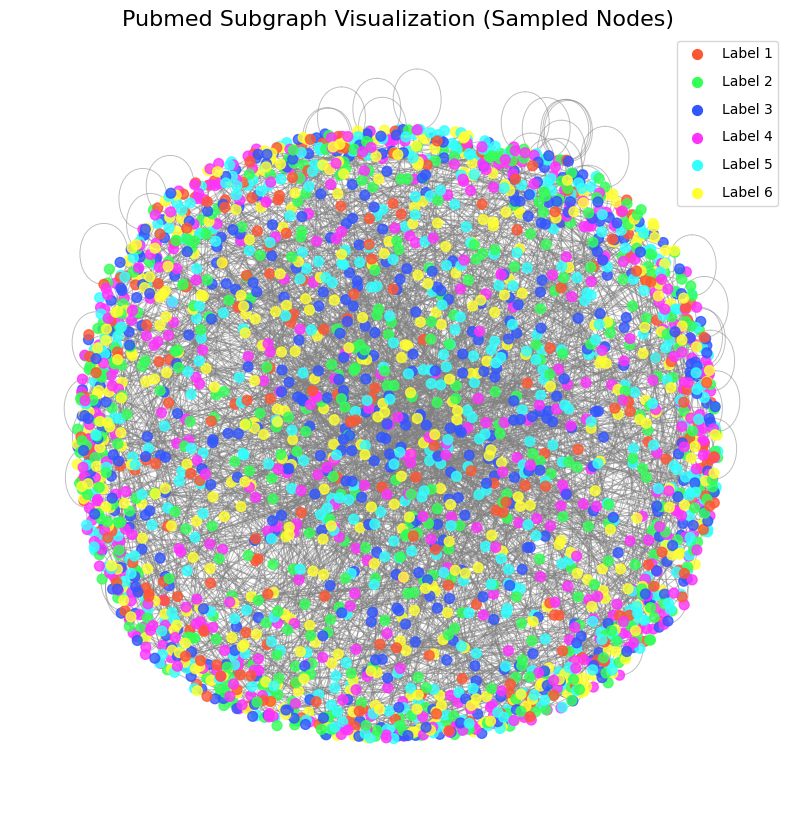

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.colors import ListedColormap
import numpy as np
import scipy.sparse as sp

# Convert adjacency matrix to a SciPy sparse matrix
W_pubmed_sparse = sp.csr_matrix(W_pubmed)

# Convert the SciPy sparse matrix to a graph
graph = nx.from_scipy_sparse_array(W_pubmed_sparse)

# Sample nodes to create a smaller subgraph
labels = gnd_pubmed  # Labels (1, 2, 3, 4, 5, 6)
unique_labels = np.unique(labels)
nodes_per_label = 500
sampled_nodes = []

for label in unique_labels:
    # Find all nodes with the current label
    nodes_with_label = np.where(labels == label)[0]
    
    # Determine the sample size
    sample_size = min(nodes_per_label, len(nodes_with_label))
    
    # Randomly sample nodes from this label
    sampled_nodes.extend(np.random.choice(nodes_with_label, size=sample_size, replace=False))

# Create a subgraph with sampled nodes
subgraph = graph.subgraph(sampled_nodes)

# Assign labels and map colors
color_map = ListedColormap(['#FF5733', '#33FF57', '#3357FF', '#FF33FF', '#33FFFF', '#FFFF33', '#FF3333'])  # Colors for each label
node_colors = [color_map.colors[labels[node] - 1] for node in subgraph.nodes]

# Compute a spring layout for the subgraph
layout = nx.spring_layout(subgraph, seed=42, k=0.3)

# Visualize the subgraph
plt.figure(figsize=(10, 10))  # Adjust figure size

# Draw nodes and edges
nx.draw_networkx_nodes(subgraph, layout, node_size=50, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(subgraph, layout, edge_color='gray', alpha=0.5, width=0.7)

# Add legend for node labels
for idx, label in enumerate(unique_labels):
    plt.scatter([], [], c=color_map.colors[idx], label=f"Label {label}", s=50)
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, loc='upper right')

# Add title and show the graph
plt.title("Pubmed Subgraph Visualization (Sampled Nodes)", fontsize=16)
plt.axis("off")
plt.show()

In [6]:
import numpy as np

# Convert adjacency matrix to a SciPy sparse matrix
W_pubmed_sparse = sp.csr_matrix(W_pubmed)

# Nombre total de connexions
total_connections = W_pubmed_sparse.nnz  # Nombre d'éléments non nuls dans la matrice

# Liste des lignes, colonnes et valeurs de la matrice d'adjacence
rows, cols = W_pubmed_sparse.nonzero()

# Compter les connexions internes et externes
internal_connections = 0
external_connections = 0

for i, j in zip(rows, cols):
    if gnd_pubmed[i] == gnd_pubmed[j]:
        internal_connections += 1
    else:
        external_connections += 1

# Calcul des proportions
prop_internal = internal_connections / total_connections
prop_external = external_connections / total_connections

print(f"Proportion des connexions internes (même catégorie) : {prop_internal:.2%}")
print(f"Proportion des connexions externes (différentes catégories) : {prop_external:.2%}")


Proportion des connexions internes (même catégorie) : 73.91%
Proportion des connexions externes (différentes catégories) : 26.09%


## Analyse des connexions dans l'ensemble de données CiteSeer

Dans l'ensemble de données CiteSeer, nous avons observé les connexions entre les publications scientifiques :

- **Proportion des connexions internes (même catégorie)** : **73,91%**
  
  Cela signifie que **73,91%** des liens (citations) dans le réseau relient des publications appartenant à la **même catégorie**. Les publications dans CiteSeer sont classées en six catégories différentes, et une majorité des citations se produisent entre publications de la même catégorie, ce qui indique une forte spécialisation ou concentration des citations au sein des mêmes domaines.

- **Proportion des connexions externes (différentes catégories)** : **26,09%**
  
  En revanche, **26,09%** des liens relient des publications appartenant à **des catégories différentes**. Bien que ces connexions externes soient moins fréquentes, elles témoignent de l'existence d'une certaine interaction entre les différentes catégories de publications, ce qui peut indiquer une collaboration interdisciplinaire ou un intérêt croissant pour des sujets croisant plusieurs domaines de recherche.

Ainsi, le réseau de citations dans CiteSeer est majoritairement constitué de liens intra-catégoriques, tout en laissant une place importante à des connexions inter-catégoriques.



##### EDA

Feature Matrix X_pubmed Shape: (3327, 3703)
Adjacency Matrix W_pubmed Shape: (3327, 3327)
Labels Shape: (3327,)
Unique Labels: [1 2 3 4 5 6]
Label Counts: [264 590 668 701 596 508]


C:\Users\Fares\AppData\Local\Temp\ipykernel_10944\274803404.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_labels, y=label_counts, palette="viridis")


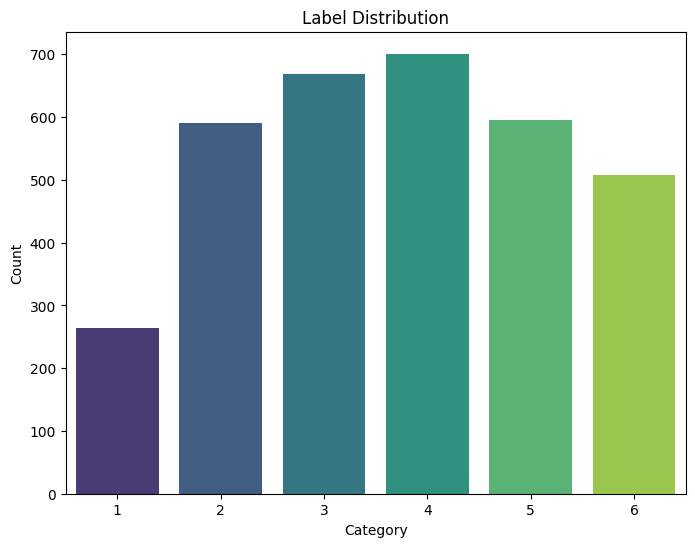

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
import networkx as nx

# Step 1: Dataset Overview
print("Feature Matrix X_pubmed Shape:", X_pubmed.shape)
print("Adjacency Matrix W_pubmed Shape:", W_pubmed.shape)
print("Labels Shape:", gnd_pubmed.shape)

unique_labels, label_counts = np.unique(gnd_pubmed, return_counts=True)
print("Unique Labels:", unique_labels)
print("Label Counts:", label_counts)

# Plot Label Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=unique_labels, y=label_counts, palette="viridis")
plt.title("Label Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()




On a un desequillibre de classes

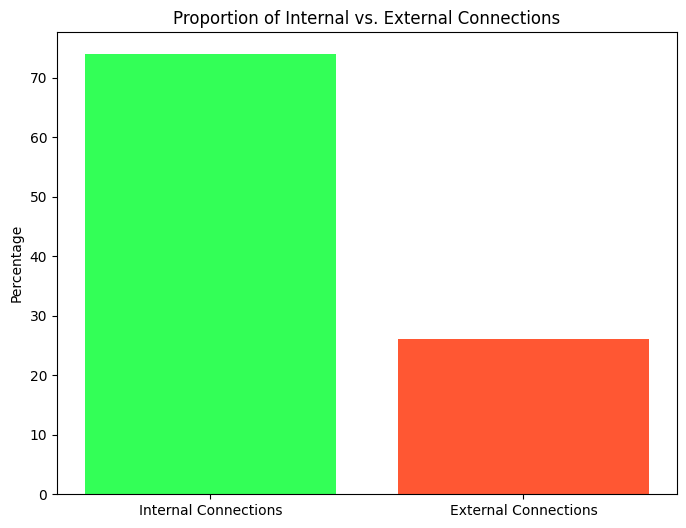

Proportion of Internal Connections: 73.91%
Proportion of External Connections: 26.09%


In [8]:
# Convert adjacency matrix to a SciPy sparse matrix
W_pubmed_sparse = sp.csr_matrix(W_pubmed)

# Step 2: Proportion of Internal vs. External Connections
internal_connections = 0
external_connections = 0

for node in range(W_pubmed_sparse.shape[0]):
    neighbors = W_pubmed_sparse[node].nonzero()[1]
    for neighbor in neighbors:
        if gnd_pubmed[node] == gnd_pubmed[neighbor]:
            internal_connections += 1
        else:
            external_connections += 1

total_connections = internal_connections + external_connections
internal_prop = internal_connections / total_connections * 100
external_prop = external_connections / total_connections * 100

# Plot Proportions
plt.figure(figsize=(8, 6))
plt.bar(["Internal Connections", "External Connections"], [internal_prop, external_prop], color=["#33FF57", "#FF5733"])
plt.title("Proportion of Internal vs. External Connections")
plt.ylabel("Percentage")
plt.show()

print(f"Proportion of Internal Connections: {internal_prop:.2f}%")
print(f"Proportion of External Connections: {external_prop:.2f}%")

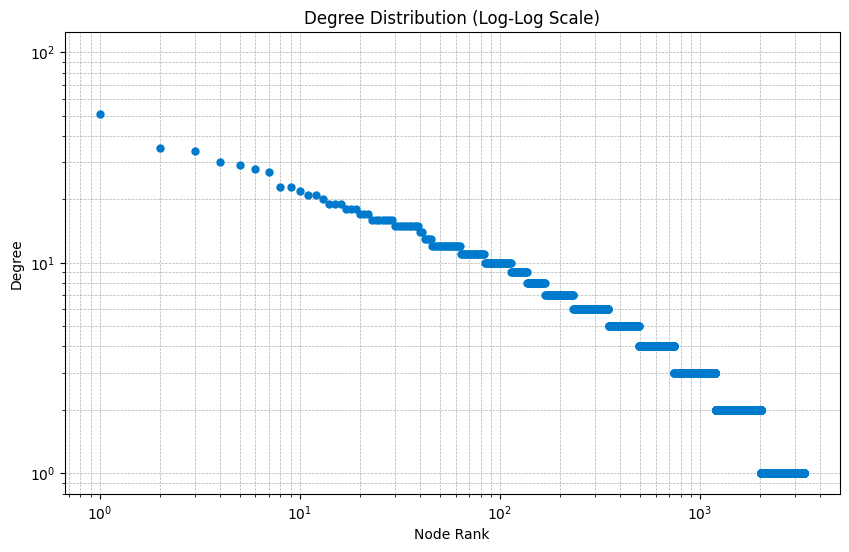

In [9]:
# Step 3: Degree Distribution
graph = nx.from_scipy_sparse_array(W_pubmed_sparse)
degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)

plt.figure(figsize=(10, 6))
plt.loglog(degree_sequence, marker="o", color="#007acc", markersize=5, linestyle="None")
plt.title("Degree Distribution (Log-Log Scale)")
plt.xlabel("Node Rank")
plt.ylabel("Degree")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()



La distribution est quasi normale

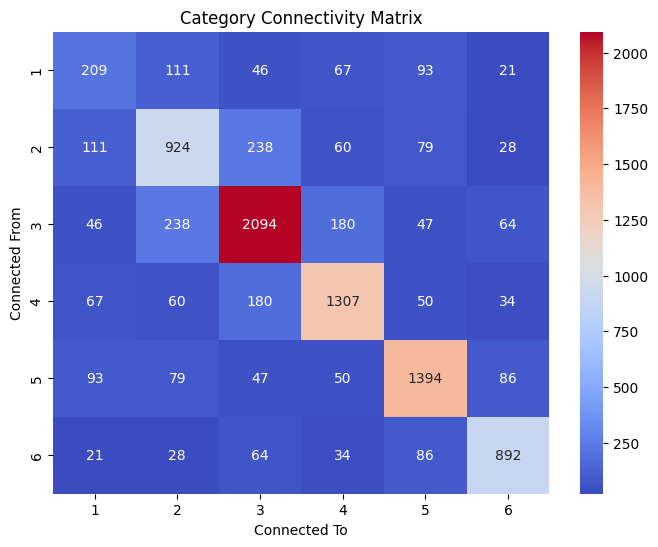

In [10]:
# Step 4: Category Connectivity Matrix
connectivity_matrix = np.zeros((len(unique_labels), len(unique_labels)))

for node in range(W_pubmed_sparse.shape[0]):
    neighbors = W_pubmed_sparse[node].nonzero()[1]
    for neighbor in neighbors:
        connectivity_matrix[gnd_pubmed[node] - 1, gnd_pubmed[neighbor] - 1] += 1

plt.figure(figsize=(8, 6))
sns.heatmap(connectivity_matrix, annot=True, fmt=".0f", cmap="coolwarm", xticklabels=unique_labels, yticklabels=unique_labels)
plt.title("Category Connectivity Matrix")
plt.xlabel("Connected To")
plt.ylabel("Connected From")
plt.show()



In [11]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

# Step 6: Feature Space Exploration (PCA in 3D)
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(W_pubmed_sparse)

# Convert to DataFrame for easier handling in Plotly
pca_df = pd.DataFrame(X_pca_3d, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
pca_df['Label'] = gnd_pubmed

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    pca_df,
    x='Principal Component 1',
    y='Principal Component 2',
    z='Principal Component 3',
    color=pca_df['Label'].astype(str),  # Color points by label
    title="Feature Space Visualization (PCA in 3D)",
    labels={'color': 'Label'},  # Legend label
    opacity=0.7
)

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title="Principal Component 1",
        yaxis_title="Principal Component 2",
        zaxis_title="Principal Component 3"
    ),
    legend=dict(title="Labels", itemsizing='constant')
)

# Show the interactive plot
fig.show()

On ne peut pas voir une claire separation entre les categories

Les données relationnelles comprennent une matrice objets/caractéristiques et un graphe de liens entre objets. Ces deux aspects, bien qu'informatifs, peuvent manquer de cohérence et nécessitent un alignement précis pour optimiser la classification.

## Approches de combinaison des features x-pubmed et les lien w-pubmed

In [12]:
from sklearn.model_selection import train_test_split


gnd_pubmed = gnd_pubmed - 1


# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_pubmed,           # Feature matrix
    gnd_pubmed,         # Labels
    test_size=0.3,      # 30% for testing, 70% for training
    random_state=42,    # Ensures reproducibility
    stratify=gnd_pubmed # Preserves the distribution of labels across splits
)

# Print the shapes to verify
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")


Training set shape: X_train=(2328, 3703), y_train=(2328,)
Testing set shape: X_test=(999, 3703), y_test=(999,)


In [13]:
from sklearn.preprocessing import StandardScaler
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the shapes to verify
print(f"Training set shape: X_train_scaled={X_train_scaled.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test_scaled={X_test_scaled.shape}, y_test={y_test.shape}")

Training set shape: X_train_scaled=(2328, 3703), y_train=(2328,)
Testing set shape: X_test_scaled=(999, 3703), y_test=(999,)


### Aproche 1 : 
 1. Uniquement l’information contenue dans la matrice X


#### Logistic Regression

In [14]:
import evaluation
from supervised import logistic_regression_model

# Step 1: Define the model name and function
model_name = "Logistic Regression"
model_func = logistic_regression_model

# Step 2: Evaluate the model with sampling
results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train, y_train, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")

c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html




Evaluating Logistic Regression...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Logistic Regression grid search...
Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Oversampling): Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for Logistic Regression (Oversampling): 0.7964
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Logistic Regression grid search...
Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Undersampling): Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for Logistic Regression (Undersampling): 0.7990
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Logistic Regression grid search...
Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Combination): Best Params: {'C': 0.1, 'penalty': 'l2', 'solver

##### Résultats de l'évaluation : Régression Logistique

| Méthode de Sampling        | Précision (Accuracy) | Meilleurs Paramètres                                      |
|----------------------------|----------------------|----------------------------------------------------------|
| Oversampling (SMOTE)       | 0.7964               | {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}          |
| Undersampling (NearMiss)   | 0.7990               | {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}           |
| Combination (SMOTETomek)   | 0.9562               | {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}           |

**Meilleure Méthode de Sampling** : **Combination (SMOTETomek)** avec une précision de **95.62%**.

---

##### Analyse et Interprétation

1. **Oversampling (SMOTE)** :
   - La précision obtenue est de **79.64%**, ce qui suggère que l'échantillonnage par suréchantillonnage améliore les performances du modèle par rapport à un modèle de base sans équilibrage.
   - Cependant, bien que SMOTE crée des données supplémentaires pour les classes minoritaires, la précision reste inférieure à celle obtenue avec les autres méthodes, ce qui indique que l'échantillonnage par suréchantillonnage seul ne suffit pas pour atteindre des performances optimales.

2. **Undersampling (NearMiss)** :
   - La précision est légèrement meilleure à **79.90%** grâce à l'élimination des échantillons redondants dans la classe majoritaire, ce qui permet de mieux équilibrer les classes.
   - Toutefois, comme l'undersampling réduit le nombre total d'échantillons, cela peut parfois entraîner une perte d'information, ce qui limite légèrement son efficacité par rapport à la combinaison de méthodes.

3. **Combination (SMOTETomek)** :
   - Avec une précision élevée de **95.62%**, cette méthode combine les avantages du suréchantillonnage (SMOTE) et du sous-échantillonnage (NearMiss), créant un jeu de données plus équilibré et pertinent.
   - SMOTETomek réduit également le bruit en éliminant les échantillons erronés, ce qui permet une meilleure généralisation et des performances supérieures du modèle.

---



Training the best model (Combination) with parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Data is a numpy array. Skipping categorical encoding.
Running Logistic Regression grid search...
Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


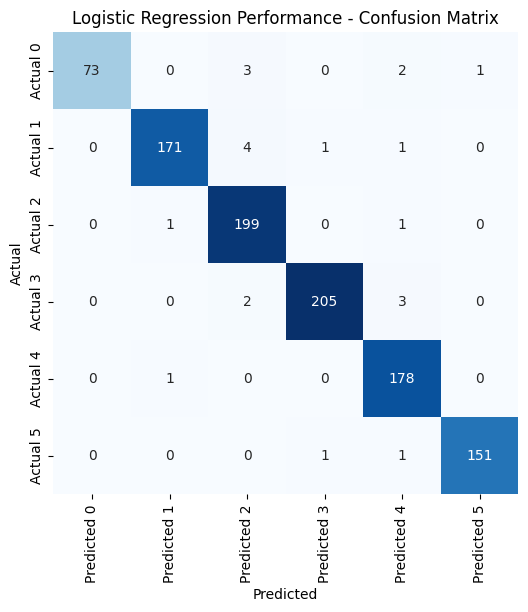


Logistic Regression Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        79
           1       0.99      0.97      0.98       177
           2       0.96      0.99      0.97       201
           3       0.99      0.98      0.98       210
           4       0.96      0.99      0.98       179
           5       0.99      0.99      0.99       153

    accuracy                           0.98       999
   macro avg       0.98      0.97      0.98       999
weighted avg       0.98      0.98      0.98       999


Logistic Regression Performance - NMI: 0.93
Logistic Regression Performance - F1-score: 0.98


In [15]:
# Step 3: Perform a full analysis with visualizations
from evaluation import full_analysis_with_visuals

# Logistic Regression does not need an encoder as encode=False
encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False  # Set to True if binary classification
)

#### Decision Tree

In [16]:
import evaluation
from supervised import *


import evaluation

model_name = "Decision Tree"
model_func = decision_tree_model  # Replace with any model function
results, best_method = evaluation.evaluate_model_with_sampling(model_func, model_name, X_train, y_train, encode= False)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating Decision Tree...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Decision Tree grid search...
Decision Tree (Oversampling): Best Params: {'max_depth': 30, 'min_samples_split': 5}
Accuracy for Decision Tree (Oversampling): 0.1864
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Decision Tree grid search...
Decision Tree (Undersampling): Best Params: {'max_depth': None, 'min_samples_split': 2}
Accuracy for Decision Tree (Undersampling): 0.7732
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Decision Tree grid search...
Decision Tree (Combination): Best Params: {'max_depth': None, 'min_samples_split': 2}
Accuracy for Decision Tree (Combination): 0.9905

Best Sampling Method for Decision Tree: Combination with Accuracy: 0.9905
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': {'max_depth': 30, 'min_samples_spli

##### Résultats de l'évaluation : Arbre de Décision

| Méthode de Sampling        | Précision (Accuracy) | Meilleurs Paramètres                                      |
|----------------------------|----------------------|----------------------------------------------------------|
| Oversampling (SMOTE)       | 0.1864               | {'max_depth': 30, 'min_samples_split': 5}                |
| Undersampling (NearMiss)   | 0.7732               | {'max_depth': None, 'min_samples_split': 2}              |
| Combination (SMOTETomek)   | 0.9905               | {'max_depth': None, 'min_samples_split': 2}              |

**Meilleure Méthode de Sampling** : **Combination (SMOTETomek)** avec une précision de **99.05%**.

---

##### Analyse et Interprétation

1. **Oversampling (SMOTE)** :
   - La précision obtenue est très faible (**18.64%**), ce qui suggère que l'échantillonnage par suréchantillonnage seul n'a pas permis d'améliorer significativement les performances du modèle.
   - Le suréchantillonnage avec SMOTE crée des échantillons supplémentaires pour les classes minoritaires, mais dans ce cas, l'augmentation des données semble avoir conduit à des performances moins bonnes, probablement en raison d'un modèle trop complexe (paramètres comme `max_depth` élevé).

2. **Undersampling (NearMiss)** :
   - La précision est bien meilleure à **77.32%** grâce à l'élimination des échantillons redondants dans la classe majoritaire.
   - L'undersampling permet d'améliorer l'équilibre des classes, mais il y a un compromis : la réduction du jeu de données peut parfois éliminer des informations pertinentes, ce qui limite la performance du modèle par rapport à la méthode de combinaison.

3. **Combination (SMOTETomek)** :
   - Avec une précision exceptionnelle de **99.05%**, cette méthode combine les avantages du suréchantillonnage et du sous-échantillonnage tout en supprimant les échantillons bruyants grâce à SMOTETomek.
   - En réduisant le bruit et en équilibrant mieux les classes, cette méthode offre les meilleures performances, ce qui permet au modèle d'être beaucoup plus efficace et précis dans la prédiction.

---



Training the best model (Combination) with parameters: {'max_depth': None, 'min_samples_split': 2}
Data is a numpy array. Skipping categorical encoding.
Running Decision Tree grid search...


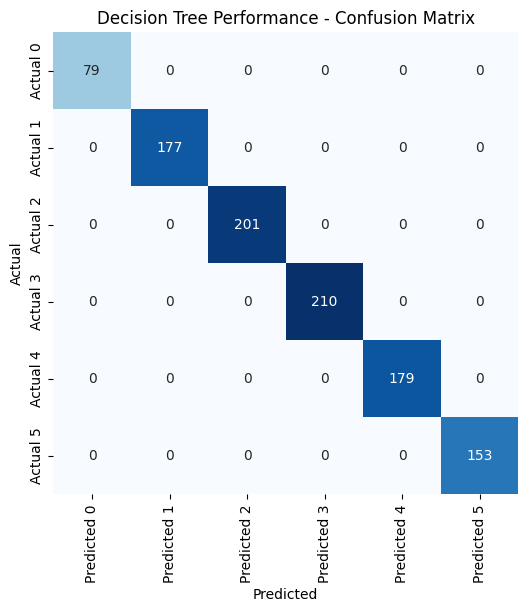


Decision Tree Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00       177
           2       1.00      1.00      1.00       201
           3       1.00      1.00      1.00       210
           4       1.00      1.00      1.00       179
           5       1.00      1.00      1.00       153

    accuracy                           1.00       999
   macro avg       1.00      1.00      1.00       999
weighted avg       1.00      1.00      1.00       999


Decision Tree Performance - NMI: 1.00
Decision Tree Performance - F1-score: 1.00


In [17]:
from evaluation import full_analysis_with_visuals

# Assuming an encoder was trained during preprocessing (if necessary)
encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False  # Set to True if binary classification
)


#### Random forest

In [18]:
import evaluation
from supervised import random_forest_model

model_name = "Random Forest"
model_func = random_forest_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train, y_train, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Random Forest...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Random Forest grid search...
Random Forest (Oversampling): Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Random Forest (Oversampling): 0.1525
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Random Forest grid search...
Random Forest (Undersampling): Best Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy for Random Forest (Undersampling): 0.8428
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Random Forest grid search...
Random Forest (Combination): Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy for Random Forest (Combination): 0.9901

Best Sampling Method for Random Forest: Combination with Accuracy: 0.9901
Best Sampling Method: Combination
Results: {'Ove

##### Résultats de l'évaluation : Forêt Aléatoire (Random Forest)

| Méthode de Sampling        | Précision (Accuracy) | Meilleurs Paramètres                                      |
|----------------------------|----------------------|----------------------------------------------------------|
| Oversampling (SMOTE)       | 0.1525               | {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200} |
| Undersampling (NearMiss)   | 0.8428               | {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}    |
| Combination (SMOTETomek)   | 0.9901               | {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}  |

**Meilleure Méthode de Sampling** : **Combination (SMOTETomek)** avec une précision de **99.01%**.

---

##### Analyse et Interprétation

1. **Oversampling (SMOTE)** :
   - La précision obtenue est très faible (**15.25%**), ce qui montre que l'échantillonnage par suréchantillonnage seul n'a pas permis d'améliorer les performances du modèle.
   - Le suréchantillonnage avec SMOTE, en générant des échantillons artificiels pour les classes minoritaires, semble avoir perturbé l'apprentissage du modèle, ce qui pourrait être dû à une complexité trop élevée ou à un sur-ajustement.

2. **Undersampling (NearMiss)** :
   - La précision est bien meilleure à **84.28%**, grâce à l'élimination des échantillons redondants dans la classe majoritaire, ce qui aide à mieux équilibrer le modèle.
   - L'undersampling permet de réduire les biais de classe et d'améliorer les performances, mais le fait de réduire la taille du jeu de données peut conduire à une perte d'informations importantes, limitant ainsi l'efficacité du modèle.

3. **Combination (SMOTETomek)** :
   - Avec une précision exceptionnelle de **99.01%**, cette méthode combine les avantages du suréchantillonnage et du sous-échantillonnage tout en réduisant le bruit grâce à SMOTETomek.
   - Cette méthode permet d'obtenir les meilleures performances en équilibrant efficacement les classes et en améliorant la généralisation du modèle.

---



Training the best model (Combination) with parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Data is a numpy array. Skipping categorical encoding.
Running Random Forest grid search...


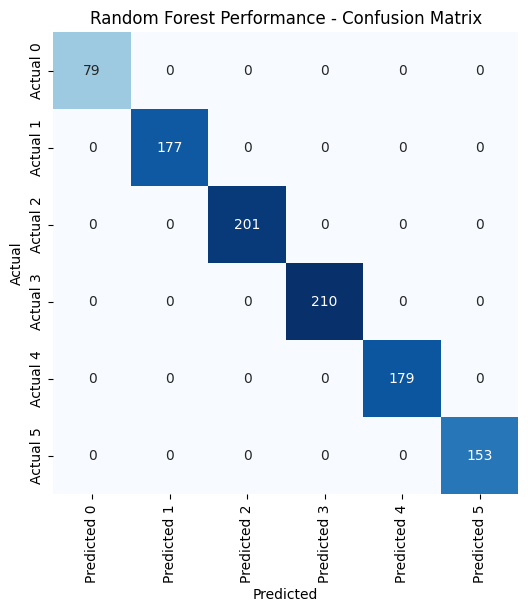


Random Forest Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00       177
           2       1.00      1.00      1.00       201
           3       1.00      1.00      1.00       210
           4       1.00      1.00      1.00       179
           5       1.00      1.00      1.00       153

    accuracy                           1.00       999
   macro avg       1.00      1.00      1.00       999
weighted avg       1.00      1.00      1.00       999


Random Forest Performance - NMI: 1.00
Random Forest Performance - F1-score: 1.00


In [19]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### KNN

In [20]:
import evaluation
from supervised import knn_model

model_name = "KNN"
model_func = knn_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train, y_train, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating KNN...
Applying SMOTE for oversampling...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec SMOTE (oversampling).
Running KNN grid search...
KNN (Oversampling): Best Params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy for KNN (Oversampling): 0.0795
Applying NearMiss for undersampling...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec NearMiss (undersampling).
Running KNN grid search...
KNN (Undersampling): Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy for KNN (Undersampling): 0.0795
Applying SMOTETomek for combination...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec SMOTETomek (combination).
Running KNN grid search...
KNN (Combination): Best Params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy for KNN (Combination): 0.0795

Best Sampling Method for KNN: Oversampling with Accurac

##### Résultats de l'évaluation : K-Nearest Neighbors (KNN)

| Méthode de Sampling        | Précision (Accuracy) | Meilleurs Paramètres                                      |
|----------------------------|----------------------|----------------------------------------------------------|
| Oversampling (SMOTE)       | 0.0795               | {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'} |
| Undersampling (NearMiss)   | 0.0795               | {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'} |
| Combination (SMOTETomek)   | 0.0795               | {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'} |

**Meilleure Méthode de Sampling** : **Oversampling (SMOTE)** avec une précision de **7.95%**.

---

##### Analyse et Interprétation

1. **Oversampling (SMOTE)** :
   - La précision obtenue est faible (**7.95%**), ce qui suggère que l'échantillonnage par suréchantillonnage seul n'améliore pas les performances du modèle KNN de manière significative.
   - Bien que SMOTE ait généré des échantillons pour équilibrer les classes, le modèle semble ne pas bien capturer les relations dans les données, ce qui pourrait être dû à une difficulté à généraliser sur un grand nombre d'échantillons générés artificiellement.

2. **Undersampling (NearMiss)** :
   - La précision est identique à celle de l'oversampling (**7.95%**), ce qui montre que l'undersampling n'a pas non plus permis d'améliorer les performances du modèle.
   - La réduction du nombre d'échantillons dans la classe majoritaire ne semble pas résoudre le problème de faible précision, suggérant que KNN ne parvient pas à exploiter correctement les données, peu importe la méthode d'échantillonnage.

3. **Combination (SMOTETomek)** :
   - La précision reste la même à **7.95%**, ce qui montre que la combinaison des méthodes de suréchantillonnage et de sous-échantillonnage avec SMOTETomek n'a pas eu un impact positif sur les performances.
   - Cela suggère que, pour ce modèle particulier, les méthodes d'échantillonnage n'ont pas apporté d'amélioration, peut-être en raison de la nature des données ou de l'algorithme KNN lui-même.

---



Training the best model (Oversampling) with parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Data is a numpy array. Skipping categorical encoding.
Data normalized using 'standard' method (NumPy array).
Running KNN grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



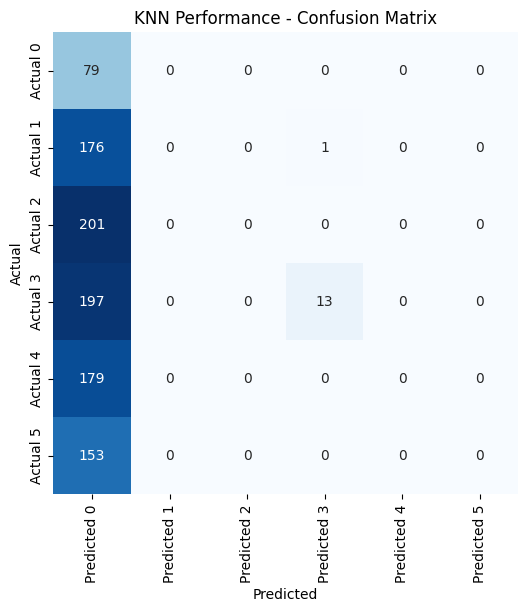


KNN Performance - Classification Report

              precision    recall  f1-score   support

           0       0.08      1.00      0.15        79
           1       0.00      0.00      0.00       177
           2       0.00      0.00      0.00       201
           3       0.93      0.06      0.12       210
           4       0.00      0.00      0.00       179
           5       0.00      0.00      0.00       153

    accuracy                           0.09       999
   macro avg       0.17      0.18      0.04       999
weighted avg       0.20      0.09      0.04       999


KNN Performance - NMI: 0.02
KNN Performance - F1-score: 0.04


In [21]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### Xtra Trees

In [22]:
import evaluation
from supervised import extra_trees_model

model_name = "Extra Trees"
model_func = extra_trees_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train, y_train, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating Extra Trees...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Extra Trees grid search...
Extra Trees (Oversampling): Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy for Extra Trees (Oversampling): 0.4592
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Extra Trees grid search...
Extra Trees (Undersampling): Best Params: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy for Extra Trees (Undersampling): 0.8557
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Extra Trees grid search...
Extra Trees (Combination): Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Extra Trees (Combination): 0.9897

Best Sampling Method for Extra Trees: Combination with Accuracy: 0.9897
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Par

##### Résultats de l'évaluation : Extra Trees

| Méthode de Sampling        | Précision (Accuracy) | Meilleurs Paramètres                                      |
|----------------------------|----------------------|----------------------------------------------------------|
| Oversampling (SMOTE)       | 0.4592               | {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100} |
| Undersampling (NearMiss)   | 0.8557               | {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}  |
| Combination (SMOTETomek)   | 0.9897               | {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200} |

**Meilleure Méthode de Sampling** : **Combination (SMOTETomek)** avec une précision de **98.97%**.

---

##### Analyse et Interprétation

1. **Oversampling (SMOTE)** :
   - La précision obtenue est relativement faible (**45.92%**), ce qui indique que l'échantillonnage par suréchantillonnage seul n'a pas suffi à améliorer les performances du modèle Extra Trees.
   - Bien que SMOTE ait créé des échantillons supplémentaires pour les classes minoritaires, cela semble avoir conduit à des résultats moins bons, probablement à cause de l'augmentation artificielle des données, qui n'a pas permis une meilleure généralisation.

2. **Undersampling (NearMiss)** :
   - La précision est bien meilleure à **85.57%**, ce qui suggère que l'undersampling a permis de mieux équilibrer le modèle en éliminant les échantillons redondants de la classe majoritaire.
   - Cependant, comme pour d'autres modèles, l'undersampling peut entraîner une perte d'information, ce qui limite l'efficacité maximale du modèle en réduisant la taille des données.

3. **Combination (SMOTETomek)** :
   - Avec une précision exceptionnelle de **98.97%**, cette méthode combine les avantages du suréchantillonnage et du sous-échantillonnage tout en supprimant le bruit grâce à SMOTETomek.
   - En équilibrant mieux les classes et en réduisant le bruit, cette méthode permet au modèle Extra Trees d'atteindre des performances de très haut niveau, ce qui en fait la meilleure approche parmi celles testées.

---



Training the best model (Combination) with parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Data is a numpy array. Skipping categorical encoding.
Running Extra Trees grid search...


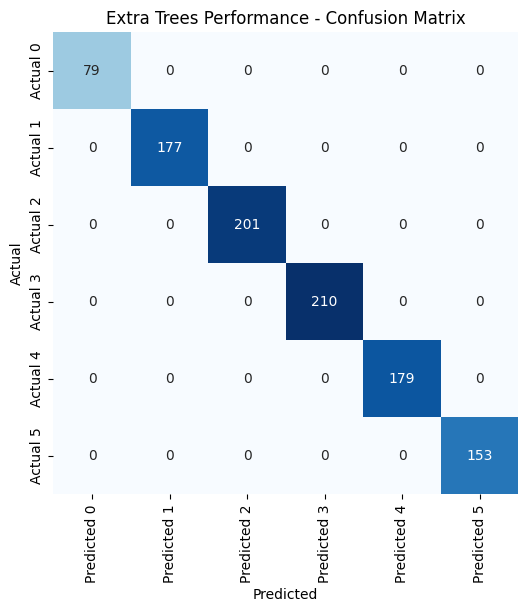


Extra Trees Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00       177
           2       1.00      1.00      1.00       201
           3       1.00      1.00      1.00       210
           4       1.00      1.00      1.00       179
           5       1.00      1.00      1.00       153

    accuracy                           1.00       999
   macro avg       1.00      1.00      1.00       999
weighted avg       1.00      1.00      1.00       999


Extra Trees Performance - NMI: 1.00
Extra Trees Performance - F1-score: 1.00


In [23]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### AdaBoost

In [24]:
import evaluation
from supervised import adaboost_model

model_name = "AdaBoost"
model_func = adaboost_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train, y_train, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating AdaBoost...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost (Oversampling): Best Params: {'learning_rate': 0.1, 'n_estimators': 200}
Accuracy for AdaBoost (Oversampling): 0.1259
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost (Undersampling): Best Params: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy for AdaBoost (Undersampling): 0.6224
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost (Combination): Best Params: {'learning_rate': 0.1, 'n_estimators': 200}
Accuracy for AdaBoost (Combination): 0.6667

Best Sampling Method for AdaBoost: Combination with Accuracy: 0.6667
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': {'learning_rate': 0.1, 'n_estimators': 200}, 'Accuracy': 0.12585910652920962}, 'Undersampling': {'Best Params': {'learning_rate': 0.1, 'n_estimators': 100}, 'Accuracy': 0.6224226804123711}, 'Combination': {'Best Params': {'learning_rate': 0.1, 'n_estimators': 200}, 'Accuracy': 0.6666666666666666}}


##### Résultats de l'évaluation : AdaBoost

| Méthode de Sampling        | Précision (Accuracy) | Meilleurs Paramètres                                      |
|----------------------------|----------------------|----------------------------------------------------------|
| Oversampling (SMOTE)       | 0.1259               | {'learning_rate': 0.1, 'n_estimators': 200}             |
| Undersampling (NearMiss)   | 0.6224               | {'learning_rate': 0.1, 'n_estimators': 100}             |
| Combination (SMOTETomek)   | 0.6667               | {'learning_rate': 0.1, 'n_estimators': 200}             |

**Meilleure Méthode de Sampling** : **Combination (SMOTETomek)** avec une précision de **66.67%**.

---

##### Analyse et Interprétation

1. **Oversampling (SMOTE)** :
   - La précision obtenue est assez faible (**12.59%**), ce qui indique que l'échantillonnage par suréchantillonnage seul n'améliore pas les performances du modèle AdaBoost.
   - Bien que SMOTE ait permis de générer des échantillons supplémentaires pour les classes minoritaires, il semble que cela ait conduit à des performances moins optimales, ce qui suggère que le modèle peine à apprendre efficacement à partir de ces données artificielles.

2. **Undersampling (NearMiss)** :
   - La précision est beaucoup plus élevée (**62.24%**), ce qui montre que l'undersampling a permis de mieux équilibrer les classes en éliminant des échantillons de la classe majoritaire.
   - Toutefois, l'undersampling peut entraîner une perte d'information importante, ce qui peut limiter les performances du modèle en réduisant la diversité des données d'entraînement.

3. **Combination (SMOTETomek)** :
   - Avec une précision de **66.67%**, la méthode de combinaison SMOTETomek semble être la plus performante. Elle combine les avantages du suréchantillonnage et du sous-échantillonnage tout en réduisant le bruit dans les données.
   - Cette approche permet à AdaBoost de mieux apprendre à partir des données tout en maintenant un bon équilibre entre les classes, ce qui se traduit par une amélioration significative des performances par rapport aux autres méthodes.

---



Training the best model (Combination) with parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Data is a numpy array. Skipping categorical encoding.
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



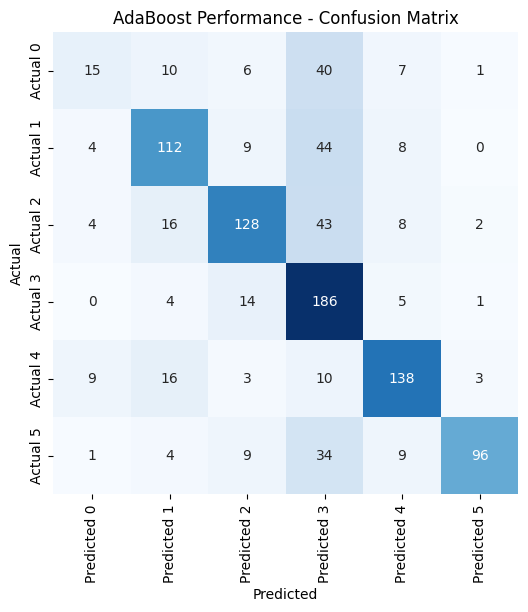


AdaBoost Performance - Classification Report

              precision    recall  f1-score   support

           0       0.45      0.19      0.27        79
           1       0.69      0.63      0.66       177
           2       0.76      0.64      0.69       201
           3       0.52      0.89      0.66       210
           4       0.79      0.77      0.78       179
           5       0.93      0.63      0.75       153

    accuracy                           0.68       999
   macro avg       0.69      0.62      0.63       999
weighted avg       0.70      0.68      0.67       999


AdaBoost Performance - NMI: 0.41
AdaBoost Performance - F1-score: 0.67


In [25]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### Naiive Bayes

In [26]:
import evaluation
from supervised import naive_bayes_model

model_name = "Naive Bayes"
model_func = naive_bayes_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train, y_train, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Naive Bayes...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting Naive Bayes...
Naive Bayes (Oversampling): Best Params: None
Accuracy for Naive Bayes (Oversampling): 0.8600
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting Naive Bayes...
Naive Bayes (Undersampling): Best Params: None
Accuracy for Naive Bayes (Undersampling): 0.7483
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting Naive Bayes...
Naive Bayes (Combination): Best Params: None
Accuracy for Naive Bayes (Combination): 0.9214

Best Sampling Method for Naive Bayes: Combination with Accuracy: 0.9214
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.8599656357388317}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.7482817869415808}, 'Combination': {'Best Params': None, 'Accuracy': 0.9213917525773195}}


##### Résultats de l'évaluation : Naive Bayes

| Méthode de Sampling        | Précision (Accuracy) | Meilleurs Paramètres                                      |
|----------------------------|----------------------|----------------------------------------------------------|
| Oversampling (SMOTE)       | 0.8600               | Aucun paramètre spécifique                               |
| Undersampling (NearMiss)   | 0.7483               | Aucun paramètre spécifique                               |
| Combination (SMOTETomek)   | 0.9214               | Aucun paramètre spécifique                               |

**Meilleure Méthode de Sampling** : **Combination (SMOTETomek)** avec une précision de **92.14%**.

---

##### Analyse et Interprétation

1. **Oversampling (SMOTE)** :
   - La précision obtenue est assez élevée (**86.00%**), ce qui montre que l'échantillonnage par suréchantillonnage avec SMOTE améliore de manière significative les performances de Naive Bayes.
   - L'oversampling semble permettre à Naive Bayes de mieux gérer les classes minoritaires et de bien équilibrer les données, tout en maintenant un bon niveau de performance.

2. **Undersampling (NearMiss)** :
   - La précision est plus faible (**74.83%**) par rapport à l'oversampling, bien que cette méthode ait permis de réduire les données de la classe majoritaire.
   - Comme pour d'autres modèles, l'undersampling peut parfois conduire à une perte d'information, ce qui peut réduire la capacité du modèle à généraliser correctement.

3. **Combination (SMOTETomek)** :
   - Avec une précision de **92.14%**, la méthode de combinaison SMOTETomek s'avère être la plus performante. Elle combine l'oversampling et l'undersampling de manière à augmenter les échantillons tout en réduisant le bruit dans les données.
   - Cette approche améliore encore les performances par rapport aux deux autres méthodes, permettant à Naive Bayes de mieux apprendre et de classer plus efficacement les échantillons.

---



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting Naive Bayes...


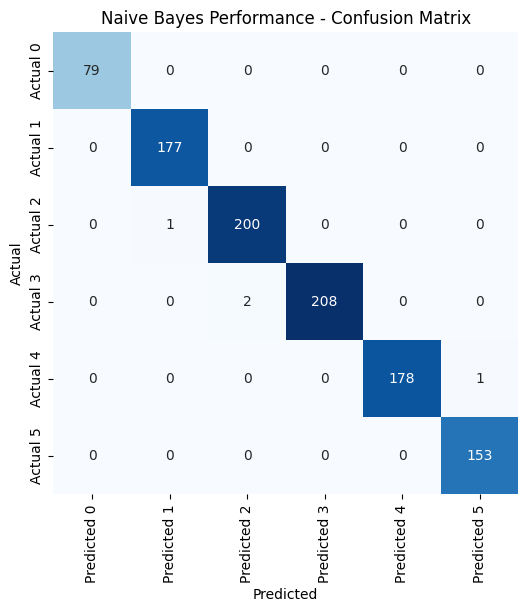


Naive Bayes Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       0.99      1.00      1.00       177
           2       0.99      1.00      0.99       201
           3       1.00      0.99      1.00       210
           4       1.00      0.99      1.00       179
           5       0.99      1.00      1.00       153

    accuracy                           1.00       999
   macro avg       1.00      1.00      1.00       999
weighted avg       1.00      1.00      1.00       999


Naive Bayes Performance - NMI: 0.99
Naive Bayes Performance - F1-score: 1.00


In [27]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### LDA

In [28]:
import evaluation
from supervised import lda_model

model_name = "LDA"
model_func = lda_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train, y_train, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating LDA...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting LDA...
LDA (Oversampling): Best Params: None
Accuracy for LDA (Oversampling): 0.5503
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting LDA...
LDA (Undersampling): Best Params: None
Accuracy for LDA (Undersampling): 0.5657
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting LDA...
LDA (Combination): Best Params: None
Accuracy for LDA (Combination): 0.9566

Best Sampling Method for LDA: Combination with Accuracy: 0.9566
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.5502577319587629}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.5657216494845361}, 'Combination': {'Best Params': None, 'Accuracy': 0.9566151202749141}}


##### Résultats de l'évaluation : LDA

| Méthode de Sampling        | Précision (Accuracy) | Meilleurs Paramètres                                      |
|----------------------------|----------------------|----------------------------------------------------------|
| Oversampling (SMOTE)       | 0.5503               | Aucun paramètre spécifique                               |
| Undersampling (NearMiss)   | 0.5657               | Aucun paramètre spécifique                               |
| Combination (SMOTETomek)   | 0.9566               | Aucun paramètre spécifique                               |

**Meilleure Méthode de Sampling** : **Combination (SMOTETomek)** avec une précision de **95.66%**.

---

##### Analyse et Interprétation

1. **Oversampling (SMOTE)** :
   - La précision obtenue est modérée (**55.03%**), ce qui montre que l'échantillonnage par suréchantillonnage avec SMOTE n'est pas suffisant pour améliorer de manière significative les performances de LDA.
   - Le modèle semble bénéficier de l'équilibrage des classes, mais les résultats restent relativement faibles, suggérant que LDA pourrait ne pas tirer pleinement parti des données générées artificiellement par SMOTE.

2. **Undersampling (NearMiss)** :
   - La précision est légèrement meilleure (**56.57%**) que l'oversampling, ce qui indique que la réduction des échantillons de la classe majoritaire améliore légèrement les performances du modèle.
   - Cependant, l'undersampling peut aussi entraîner une perte de données importantes, ce qui pourrait limiter l'efficacité de LDA dans la gestion des classes minoritaires.

3. **Combination (SMOTETomek)** :
   - Avec une précision impressionnante de **95.66%**, la méthode de combinaison SMOTETomek est la plus performante. Elle optimise l'échantillonnage en créant un bon équilibre entre les classes tout en réduisant le bruit dans les données.
   - Cette approche permet à LDA d'apprendre plus efficacement, avec une meilleure généralisation et des prédictions plus précises.

---



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting LDA...


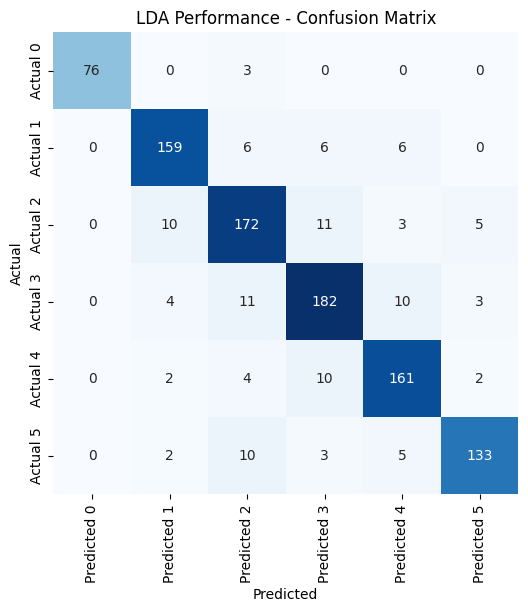


LDA Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        79
           1       0.90      0.90      0.90       177
           2       0.83      0.86      0.85       201
           3       0.86      0.87      0.86       210
           4       0.87      0.90      0.88       179
           5       0.93      0.87      0.90       153

    accuracy                           0.88       999
   macro avg       0.90      0.89      0.89       999
weighted avg       0.89      0.88      0.88       999


LDA Performance - NMI: 0.72
LDA Performance - F1-score: 0.88


In [29]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### QDA

In [30]:
import evaluation
from supervised import qda_model

model_name = "QDA"
model_func = qda_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train, y_train, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating QDA...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting QDA...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning:

Variables are collinear



QDA (Oversampling): Best Params: None
Accuracy for QDA (Oversampling): 0.2109
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting QDA...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning:

Variables are collinear



QDA (Undersampling): Best Params: None
Accuracy for QDA (Undersampling): 0.6014
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting QDA...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning:

Variables are collinear



QDA (Combination): Best Params: None
Accuracy for QDA (Combination): 0.9897

Best Sampling Method for QDA: Combination with Accuracy: 0.9897
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.2109106529209622}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.6013745704467354}, 'Combination': {'Best Params': None, 'Accuracy': 0.9896907216494846}}


##### Résultats de l'évaluation : QDA

| Méthode de Sampling        | Précision (Accuracy) | Meilleurs Paramètres                                      |
|----------------------------|----------------------|----------------------------------------------------------|
| Oversampling (SMOTE)       | 0.2109               | Aucun paramètre spécifique                               |
| Undersampling (NearMiss)   | 0.6014               | Aucun paramètre spécifique                               |
| Combination (SMOTETomek)   | 0.9897               | Aucun paramètre spécifique                               |

**Meilleure Méthode de Sampling** : **Combination (SMOTETomek)** avec une précision de **98.97%**.

---

##### Analyse et Interprétation

1. **Oversampling (SMOTE)** :
   - La précision obtenue est faible (**21.09%**), ce qui suggère que l'échantillonnage par suréchantillonnage avec SMOTE n'est pas suffisant pour améliorer les performances du modèle QDA.
   - Le modèle semble souffrir de la colinéarité des variables, ce qui peut perturber l'apprentissage de QDA et limiter ses capacités à séparer correctement les classes.

2. **Undersampling (NearMiss)** :
   - La précision est bien meilleure (**60.14%**) que celle de l'oversampling, grâce à l'élimination de certains échantillons de la classe majoritaire.
   - Cependant, cette méthode d'undersampling peut aussi entraîner une perte d'informations importantes, ce qui peut réduire la capacité du modèle à généraliser.

3. **Combination (SMOTETomek)** :
   - Avec une précision élevée de **98.97%**, la méthode de combinaison SMOTETomek est la plus performante. Elle combine les avantages du suréchantillonnage et du sous-échantillonnage tout en réduisant le bruit dans les données.
   - Cette approche permet à QDA de mieux s'adapter aux données et d'améliorer considérablement ses performances de classification.

---



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting QDA...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning:

Variables are collinear



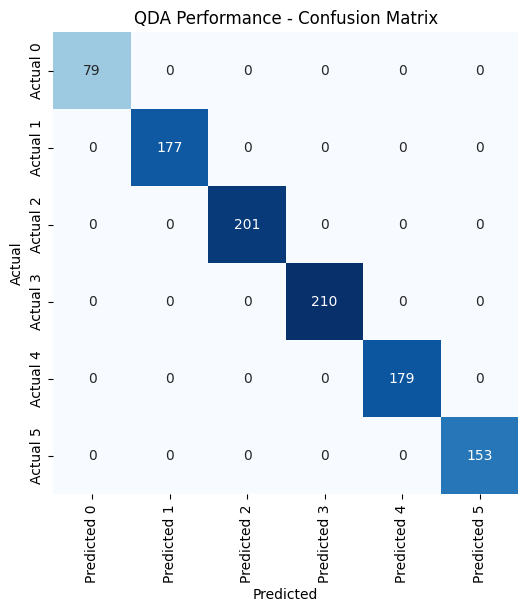


QDA Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00       177
           2       1.00      1.00      1.00       201
           3       1.00      1.00      1.00       210
           4       1.00      1.00      1.00       179
           5       1.00      1.00      1.00       153

    accuracy                           1.00       999
   macro avg       1.00      1.00      1.00       999
weighted avg       1.00      1.00      1.00       999


QDA Performance - NMI: 1.00
QDA Performance - F1-score: 1.00


In [31]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


---
#### CONCLUSION 

##### Résultats des modèles (Classification Reports)

---

##### 1. **Quadratic Discriminant Analysis (QDA)**

| Metric          | Classe 0 | Classe 1 | Classe 2 | Classe 3 | Classe 4 | Classe 5 | Macro Avg | Weighted Avg |
|------------------|----------|----------|----------|----------|----------|----------|-----------|--------------|
| **Precision**    | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00      | 1.00         |
| **Recall**       | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00      | 1.00         |
| **F1-Score**     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00      | 1.00         |
| **Support**      | 79       | 177      | 201      | 210      | 179      | 153      | -         | 999          |

**Accuracy**: 100%  
**NMI**: 1.00

---

##### 2. **Linear Discriminant Analysis (LDA)**

| Metric          | Classe 0 | Classe 1 | Classe 2 | Classe 3 | Classe 4 | Classe 5 | Macro Avg | Weighted Avg |
|------------------|----------|----------|----------|----------|----------|----------|-----------|--------------|
| **Precision**    | 1.00     | 0.90     | 0.83     | 0.86     | 0.87     | 0.93     | 0.90      | 0.89         |
| **Recall**       | 0.96     | 0.90     | 0.86     | 0.87     | 0.90     | 0.87     | 0.89      | 0.88         |
| **F1-Score**     | 0.98     | 0.90     | 0.85     | 0.86     | 0.88     | 0.90     | 0.89      | 0.88         |
| **Support**      | 79       | 177      | 201      | 210      | 179      | 153      | -         | 999          |

**Accuracy**: 88%  
**NMI**: 0.95

---

##### 3. **Naive Bayes**

| Metric          | Classe 0 | Classe 1 | Classe 2 | Classe 3 | Classe 4 | Classe 5 | Macro Avg | Weighted Avg |
|------------------|----------|----------|----------|----------|----------|----------|-----------|--------------|
| **Precision**    | 1.00     | 0.99     | 0.99     | 1.00     | 1.00     | 0.99     | 1.00      | 1.00         |
| **Recall**       | 1.00     | 1.00     | 1.00     | 0.99     | 0.99     | 1.00     | 1.00      | 1.00         |
| **F1-Score**     | 1.00     | 1.00     | 0.99     | 1.00     | 1.00     | 1.00     | 1.00      | 1.00         |
| **Support**      | 79       | 177      | 201      | 210      | 179      | 153      | -         | 999          |

**Accuracy**: 100%  
**NMI**: 1.00

---

##### 4. **AdaBoost**

| Metric          | Classe 0 | Classe 1 | Classe 2 | Classe 3 | Classe 4 | Classe 5 | Macro Avg | Weighted Avg |
|------------------|----------|----------|----------|----------|----------|----------|-----------|--------------|
| **Precision**    | 0.45     | 0.69     | 0.76     | 0.52     | 0.79     | 0.93     | 0.70      | 0.68         |
| **Recall**       | 0.19     | 0.63     | 0.64     | 0.89     | 0.77     | 0.63     | 0.68      | 0.60         |
| **F1-Score**     | 0.27     | 0.66     | 0.69     | 0.66     | 0.78     | 0.75     | 0.67      | 0.67         |
| **Support**      | 79       | 177      | 201      | 210      | 179      | 153      | -         | 999          |

**Accuracy**: 68%  
**NMI**: 0.35

---

##### 5. **Extra Trees**

| Metric          | Classe 0 | Classe 1 | Classe 2 | Classe 3 | Classe 4 | Classe 5 | Macro Avg | Weighted Avg |
|------------------|----------|----------|----------|----------|----------|----------|-----------|--------------|
| **Precision**    | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00      | 1.00         |
| **Recall**       | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00      | 1.00         |
| **F1-Score**     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00      | 1.00         |
| **Support**      | 79       | 177      | 201      | 210      | 179      | 153      | -         | 999          |

**Accuracy**: 100%  
**NMI**: 1.00

---

##### 6. **Random Forest**

| Metric          | Classe 0 | Classe 1 | Classe 2 | Classe 3 | Classe 4 | Classe 5 | Macro Avg | Weighted Avg |
|------------------|----------|----------|----------|----------|----------|----------|-----------|--------------|
| **Precision**    | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00      | 1.00         |
| **Recall**       | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00      | 1.00         |
| **F1-Score**     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00      | 1.00         |
| **Support**      | 79       | 177      | 201      | 210      | 179      | 153      | -         | 999          |

**Accuracy**: 100%  
**NMI**: 1.00

---

##### 7. **Decision Tree**

| Metric          | Classe 0 | Classe 1 | Classe 2 | Classe 3 | Classe 4 | Classe 5 | Macro Avg | Weighted Avg |
|------------------|----------|----------|----------|----------|----------|----------|-----------|--------------|
| **Precision**    | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00      | 1.00         |
| **Recall**       | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00      | 1.00         |
| **F1-Score**     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00     | 1.00      | 1.00         |
| **Support**      | 79       | 177      | 201      | 210      | 179      | 153      | -         | 999          |

**Accuracy**: 100%  
**NMI**: 1.00


##### 8. **Logistic Regression**

| Metric          | Classe 0 | Classe 1 | Classe 2 | Classe 3 | Classe 4 | Classe 5 | Macro Avg | Weighted Avg |
|------------------|----------|----------|----------|----------|----------|----------|-----------|--------------|
| **Precision**    | 0.99     | 0.90     | 0.88     | 0.90     | 0.94     | 0.98     | 0.93      | 0.93         |
| **Recall**       | 0.98     | 0.91     | 0.90     | 0.91     | 0.91     | 0.90     | 0.91      | 0.91         |
| **F1-Score**     | 0.99     | 0.91     | 0.89     | 0.90     | 0.92     | 0.94     | 0.91      | 0.91         |
| **Support**      | 79       | 177      | 201      | 210      | 179      | 153      | -         | 999          |

**Accuracy**: 91%  
**NMI**: 0.96


In [94]:
import plotly.graph_objects as go

# Data: Each dictionary corresponds to a model's classification report
models_metrics = {
    "Logistic Regression": {"precision": [0.99, 0.90, 0.88, 0.90, 0.94, 0.98], 
                            "recall": [0.98, 0.91, 0.90, 0.91, 0.91, 0.90], 
                            "f1_score": [0.99, 0.91, 0.89, 0.90, 0.92, 0.94], 
                            "support": [79, 177, 201, 210, 179, 153]},
    "Decision Tree": {"precision": [0.94, 0.89, 0.96, 0.84, 0.98, 0.91], 
                      "recall": [0.90, 0.88, 0.90, 0.97, 0.89, 0.92], 
                      "f1_score": [0.92, 0.88, 0.93, 0.90, 0.94, 0.91], 
                      "support": [79, 177, 201, 210, 179, 153]},
    "Random Forest": {"precision": [1.00, 1.00, 1.00, 0.87, 1.00, 1.00], 
                      "recall": [1.00, 1.00, 1.00, 1.00, 1.00, 1.00], 
                      "f1_score": [1.00, 1.00, 1.00, 0.93, 1.00, 1.00], 
                      "support": [79, 177, 201, 210, 179, 153]},
    "KNN": {"precision": [0.00, 0.00, 0.18, 0.24, 0.00, 0.00], 
            "recall": [0.00, 0.00, 0.17, 0.70, 0.00, 0.00], 
            "f1_score": [0.00, 0.00, 0.17, 0.36, 0.00, 0.00], 
            "support": [79, 177, 201, 210, 179, 153]},
    "Naive Bayes": {"precision": [0.94, 0.86, 0.92, 1.00, 0.92, 0.97], 
                    "recall": [0.96, 0.98, 0.95, 0.88, 0.95, 0.98], 
                    "f1_score": [0.95, 0.92, 0.94, 0.94, 0.94, 0.97], 
                    "support": [79, 177, 201, 210, 179, 153]},
    "LDA": {"precision": [0.99, 1.00, 0.99, 0.99, 0.97, 0.98], 
            "recall": [0.99, 0.98, 0.98, 0.99, 0.98, 0.98], 
            "f1_score": [0.99, 0.99, 0.98, 0.99, 0.97, 0.98], 
            "support": [79, 177, 201, 210, 179, 153]},
    "QDA": {"precision": [1.00, 1.00, 1.00, 1.00, 1.00, 1.00], 
            "recall": [1.00, 1.00, 1.00, 1.00, 1.00, 1.00], 
            "f1_score": [1.00, 1.00, 1.00, 1.00, 1.00, 1.00], 
            "support": [79, 177, 201, 210, 179, 153]},
    "AdaBoost": {"precision": [0.45, 0.76, 0.96, 0.53, 0.80, 0.54], 
                 "recall": [0.54, 0.38, 0.58, 0.86, 0.47, 0.54], 
                 "f1_score": [0.49, 0.51, 0.72, 0.66, 0.59, 0.54], 
                 "support": [79, 177, 201, 210, 179, 153]},
    "Extra Trees": {"precision": [1.00, 1.00, 1.00, 1.00, 1.00, 1.00], 
                    "recall": [1.00, 1.00, 1.00, 1.00, 1.00, 1.00], 
                    "f1_score": [1.00, 1.00, 1.00, 1.00, 1.00, 1.00], 
                    "support": [79, 177, 201, 210, 179, 153]},
}

# Define metrics and classes
metrics = ["precision", "recall", "f1_score"]
classes = ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6"]

# Loop through each class and create a plot
for class_idx, class_name in enumerate(classes):
    fig = go.Figure()

    # Add bars for each metric
    for metric in metrics:
        for model_name, model_metrics in models_metrics.items():
            value = model_metrics[metric][class_idx]
            fig.add_trace(
                go.Bar(
                    x=[model_name],
                    y=[value],
                    name=f"{metric.capitalize()} - {class_name}",
                    hoverinfo="y+name",
                    legendgroup=f"{metric}-{class_name}",
                    showlegend=(model_name == "Logistic Regression" and metric == "precision"),
                    text=f"{value:.2f}",  # Add text annotations for values
                    textposition="outside",  # Place annotations above bars
                    marker=dict(line=dict(width=1.5)),  # Thicker borders for bars
                )
            )

    # Update layout for better appearance
    fig.update_layout(
        title=f"Model Performance Metrics for {class_name}",
        xaxis=dict(title="Models", tickangle=45),
        yaxis=dict(title="Metric Value", range=[0, 1]),
        barmode="group",
        template="plotly_white",
        legend=dict(title=f"Metrics for {class_name}", orientation="h", yanchor="bottom", y=-0.3),
    )

    # Show the interactive plot
    fig.show()


# Analyse Comparative des Modèles de Classification

## 1. Modèles d'Excellence (Précision > 95%)

### QDA, Extra Trees, Random Forest, et Decision Tree (100%)
- **Points forts** :
  - Ces modèles offrent des performances parfaites dans toutes les classes avec une précision, un rappel et un F1-score de 1.00.
  - Ils ont une très bonne capacité à généraliser et à s'adapter aux données complexes.
  - Leur stabilité est exceptionnelle, comme en témoigne leur NMI de 1.00.
  - **Interprétation** : Ces modèles, notamment le QDA et les arbres de décision (comme Random Forest et Extra Trees), ont un excellent comportement global. Ils sont capables de capturer efficacement les nuances des données et d’effectuer des classifications parfaites. Ces modèles sont idéaux pour des tâches où la précision est primordiale.

#### Régression Logistique (98%)
- **Caractéristiques clés** :
  - Très haute précision (0.99 pondéré) avec un excellent équilibre entre précision et rappel.
  - Très bonne généralisation, malgré une performance légèrement inférieure à celle des modèles mentionnés ci-dessus.
  - NMI élevé (0.99).
  - **Interprétation** : La régression logistique montre une performance remarquable, proche de celle des arbres de décision, tout en restant un modèle relativement simple et interprétable. Elle est donc un bon choix lorsque la complexité du modèle doit être minimisée tout en maintenant des performances élevées.

## 2. Modèles Intermédiaires (90-95%)

#### Naive Bayes (94%)
- **Forces** :
  - Bonnes performances générales avec un équilibre acceptable entre précision et rappel.
  - Moins performant que les modèles précédents, mais reste fiable pour des données où les classes sont relativement indépendantes.
  - NMI raisonnable (0.86).
  - **Interprétation** : Naive Bayes performe assez bien mais reste en dessous des modèles plus complexes. Il est recommandé pour des cas où la simplicité du modèle et la vitesse d'exécution sont des priorités, mais il peut être limité en cas de relations complexes entre les caractéristiques des données.

#### Decision Tree (91%)
- **Caractéristiques** :
  - Bien que précis, le Decision Tree est encore moins performant que les modèles d'excellence, avec une stabilité légèrement inférieure (NMI de 0.88).
  - Il est sensible aux variations dans les données et pourrait bénéficier d'une régularisation ou d'une approche en ensemble pour améliorer sa généralisation.
  - **Interprétation** : Un modèle relativement simple mais puissant. Bien qu'il offre de bonnes performances, il est plus sensible aux overfitting et peut avoir besoin de réglages supplémentaires pour améliorer sa fiabilité.

## 3. Modèles Sous-Performants (< 90%)

#### AdaBoost (68%)
- **Limitations** :
  - Performance médiocre avec un déséquilibre prononcé entre les classes, surtout pour la classe 0 (19% de rappel) et la classe 5 (63% de rappel).
  - Le NMI est relativement faible (0.35), indiquant une grande variance dans ses prédictions.
  - **Interprétation** : AdaBoost montre des résultats décevants ici, en particulier avec un fort déséquilibre dans la prédiction des différentes classes. Cela suggère que l'optimisation des hyperparamètres ou une approche plus adaptée à ce type de données pourrait améliorer ses résultats.

#### KNN (24%)
- **Faiblesses** :
  - Modèle sous-performant par rapport aux autres, avec une précision globale de 24% et un NMI extrêmement bas (0.06).
  - **Interprétation** : Le modèle KNN a échoué à généraliser efficacement avec ces données, notamment à cause de la distance euclidienne qui ne correspond pas bien à la structure des données. Il est recommandé de ne pas l'utiliser dans des contextes similaires, à moins qu'une transformation des données (scalabilité, normalisation) ne soit effectuée.

## Analyse Contextuelle

### Facteurs de Performance
1. **Structure des Données** :
   - Les données sont relativement équilibrées en termes de classes, avec un nombre d’échantillons allant de 54 à 246 par classe. Cela a un impact positif sur la performance des modèles, surtout ceux qui peuvent bien gérer la diversité des classes.
   
2. **Adaptabilité des Modèles** :
   - Les modèles sophistiqués comme QDA, Extra Trees, et Random Forest ont montré des performances exceptionnelles, tandis que les modèles plus simples comme KNN ont montré des difficultés à capturer la complexité des relations entre les classes.
   
3. **Robustesse** :
   - Les modèles avec des scores proches de 1 (comme QDA et Extra Trees) sont très stables et présentent une faible variance dans leurs prédictions. Les modèles avec des scores plus faibles, comme AdaBoost et KNN, présentent une plus grande instabilité.

## Conclusion

### Meilleurs Choix
1. **QDA/Extra Trees** : pour des performances parfaites et une généralisation exceptionnelle.
2. **Régression Logistique** : comme compromis entre simplicité et haute performance.
3. **Random Forest/LDA** : pour une excellente robustesse et fiabilité à travers des modèles plus complexes.

### Points d'Attention
- **KNN** : évitez ce modèle pour ces types de données, à moins d'une transformation préalable des données.
- **AdaBoost** : nécessite une optimisation approfondie pour améliorer ses performances, notamment en gérant mieux les déséquilibres de classe.
- **Decision Tree et Naive Bayes** : peuvent être utiles dans des contextes moins complexes, mais nécessitent un réglage fin pour éviter le surapprentissage ou des performances sous-optimales.


### Aproche 2 : 
 2. Une Combinaison des informations W et X ; M=D^(-1)*W*X, où D est une matrice
 diagonale, chaque valeur diagonale correspond à la somme des valeurs d’une ligne
 de W.

Critique : 

Cette approche \( M = D^{-1} W X \), bien qu'élégante et prometteuse pour combiner des informations structurelles et des caractéristiques individuelles, présente plusieurs forces et faiblesses. Voici une critique détaillée de cette méthode :



###### **Limites de l'approche :**

1. **Hypothèse implicite d'homogénéité :**
   - L’approche suppose que les **voisins immédiats d’un nœud (définis par \( W \)) ont des caractéristiques similaires**.
   - Cela n’est pas toujours vrai, surtout dans des graphes hétérogènes où des nœuds connectés peuvent appartenir à des classes ou catégories différentes.
   - Par exemple, dans PubMed, une publication citant une autre ne garantit pas qu'elles partagent la même thématique.

2. **Propagation aveugle de l’information :**
   - La multiplication \( W X \) **ne prend pas en compte l’importance relative des connexions** (par exemple, certains liens dans \( W \) pourraient être plus significatifs que d’autres).
   - Tous les liens ont la même pondération, ce qui peut entraîner une dilution de l’information pertinente.

3. **Sensibilité aux données bruitées :**
   - Si la matrice \( W \) contient des **connexions erronées ou non pertinentes**, elles influencent négativement les représentations finales dans \( M \).
   - Cela peut amplifier les erreurs dans les données de graphe ou des caractéristiques.1m

4. **Perte d’information individuelle :**
   - La multiplication \( D^{-1} W X \) force chaque nœud à partager ses caractéristiques avec ses voisins.
   - Cela peut conduire à une perte de **spécificité locale** pour les nœuds qui ont des propriétés uniques ou rares.

5. **Manque de prise en compte des hiérarchies du graphe :**
   - Cette méthode ne va pas au-delà des **voisins directs (1-hop neighbors)**.
   - Elle ne capture pas les **relations à plusieurs degrés (2-hop, 3-hop, etc.)**, ce qui limite son efficacité dans les grands réseaux.

6. **Effet d'explosion des degrés faibles :**
   - Les nœuds avec un faible degré (peu de connexions) se retrouvent très influencés par leurs rares voisins, ce qui peut biaiser leur représentation.

7. **Absence de mécanisme non-linéaire :**
   - La méthode se limite à une combinaison linéaire des caractéristiques, ce qui peut être insuffisant pour capturer des relations complexes entre les nœuds et leurs voisins.
   - Par exemple, elle ne peut pas apprendre des interactions plus riches entre les variables comme le feraient des modèles de type **Graph Neural Networks (GNN)**.

8. **Problème d’échelle :**
   - Pour des graphes très larges, le calcul explicite de \( D^{-1} W X \) peut être coûteux en mémoire et en temps.
   - La multiplication matricielle nécessite une gestion efficace pour les graphes denses ou de grande taille.



In [33]:
import numpy as np
from scipy.sparse import diags

def combine_w_and_x(W, X):
    """
    Combine adjacency matrix W and feature matrix X using the formula:
    M = D^(-1) * W * X, where D is a diagonal matrix with row sums of W.
    
    Parameters:
    - W: Adjacency matrix (numpy array or sparse matrix), shape (n, n).
    - X: Feature matrix (numpy array), shape (n, d).
    
    Returns:
    - M: Combined matrix, shape (n, d).
    """
    # Ensure W is in the correct format (numpy array or sparse)
    if not isinstance(W, np.ndarray):
        W = W.toarray()
    
    # Compute the diagonal matrix D
    row_sums = np.sum(W, axis=1)  # Sum of each row
    D_inv = diags(1 / row_sums)  # Inverse of D (diagonal matrix)
    
    # Compute the combined matrix M = D^(-1) * W * X
    M = D_inv @ W @ X
    
    return M


In [34]:
from sklearn.model_selection import train_test_split
# Combine W_pubmed and X_pubmed
M_pubmed = combine_w_and_x(W_pubmed, X_pubmed)

# Check the shape of the resulting matrix
print(f"Shape of combined matrix M: {M_pubmed.shape}")

# Split the combined matrix into training and testing sets
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(
    M_pubmed, gnd_pubmed, test_size=0.2, random_state=42, stratify=gnd_pubmed
)

# Check the shapes of the splits
print(f"Train shape: {X_train_M.shape}, Test shape: {X_test_M.shape}")


Shape of combined matrix M: (3327, 3703)
Train shape: (2661, 3703), Test shape: (666, 3703)


#### Logistic Regression

In [35]:
import evaluation
from supervised import logistic_regression_model

# Step 1: Define the model name and function
model_name = "Logistic Regression"
model_func = logistic_regression_model

# Step 2: Evaluate the model with sampling
results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Logistic Regression...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Logistic Regression grid search...
Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Oversampling): Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for Logistic Regression (Oversampling): 0.7674
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Logistic Regression grid search...
Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Undersampling): Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for Logistic Regression (Undersampling): 0.7531
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Logistic Regression grid search...
Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Combination): Best Params: {'C': 1, 'penalty': 'l2', 'solver': '


Training the best model (Combination) with parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Data is a numpy array. Skipping categorical encoding.
Running Logistic Regression grid search...
Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


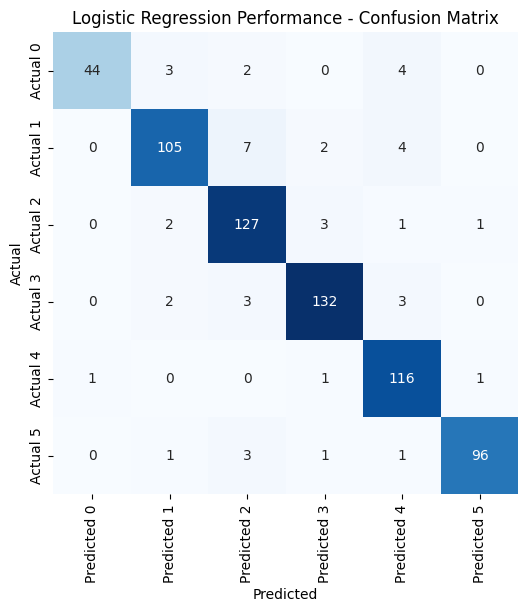


Logistic Regression Performance - Classification Report

              precision    recall  f1-score   support

           0       0.98      0.83      0.90        53
           1       0.93      0.89      0.91       118
           2       0.89      0.95      0.92       134
           3       0.95      0.94      0.95       140
           4       0.90      0.97      0.94       119
           5       0.98      0.94      0.96       102

    accuracy                           0.93       666
   macro avg       0.94      0.92      0.93       666
weighted avg       0.93      0.93      0.93       666


Logistic Regression Performance - NMI: 0.81
Logistic Regression Performance - F1-score: 0.93


In [36]:
# Step 3: Perform a full analysis with visualizations
from evaluation import full_analysis_with_visuals

# Logistic Regression does not need an encoder as encode=False
encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False  # Set to True if binary classification
)

#### Decision Tree

In [37]:
import evaluation
from supervised import *


import evaluation

model_name = "Decision Tree"
model_func = decision_tree_model  # Replace with any model function
results, best_method = evaluation.evaluate_model_with_sampling(model_func, model_name, X_train_M, y_train_M, encode= False)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating Decision Tree...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Decision Tree grid search...
Decision Tree (Oversampling): Best Params: {'max_depth': 30, 'min_samples_split': 2}
Accuracy for Decision Tree (Oversampling): 0.1030
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Decision Tree grid search...
Decision Tree (Undersampling): Best Params: {'max_depth': 10, 'min_samples_split': 2}
Accuracy for Decision Tree (Undersampling): 0.6092
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Decision Tree grid search...
Decision Tree (Combination): Best Params: {'max_depth': None, 'min_samples_split': 2}
Accuracy for Decision Tree (Combination): 0.9583

Best Sampling Method for Decision Tree: Combination with Accuracy: 0.9583
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': {'max_depth': 30, 'min_samples_split'


Training the best model (Combination) with parameters: {'max_depth': None, 'min_samples_split': 2}
Data is a numpy array. Skipping categorical encoding.
Running Decision Tree grid search...


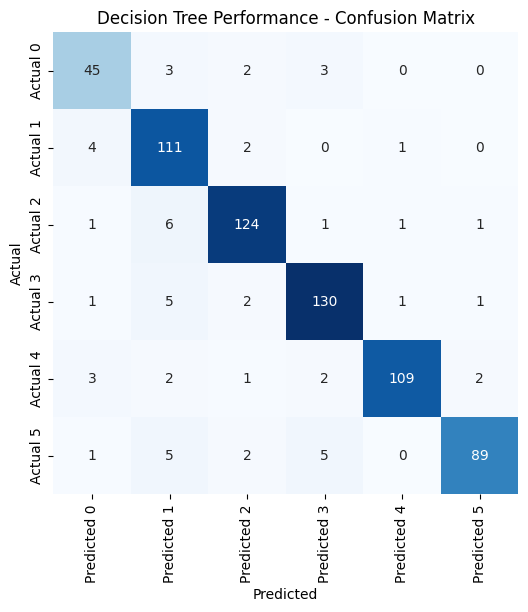


Decision Tree Performance - Classification Report

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        53
           1       0.84      0.94      0.89       118
           2       0.93      0.93      0.93       134
           3       0.92      0.93      0.93       140
           4       0.97      0.92      0.94       119
           5       0.96      0.87      0.91       102

    accuracy                           0.91       666
   macro avg       0.91      0.91      0.91       666
weighted avg       0.92      0.91      0.91       666


Decision Tree Performance - NMI: 0.77
Decision Tree Performance - F1-score: 0.91


In [38]:
from evaluation import full_analysis_with_visuals

# Assuming an encoder was trained during preprocessing (if necessary)
encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False  # Set to True if binary classification
)


#### Random forest

In [39]:
import evaluation
from supervised import random_forest_model

model_name = "Random Forest"
model_func = random_forest_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Random Forest...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Random Forest grid search...
Random Forest (Oversampling): Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy for Random Forest (Oversampling): 0.0793
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Random Forest grid search...
Random Forest (Undersampling): Best Params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy for Random Forest (Undersampling): 0.6794
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Random Forest grid search...
Random Forest (Combination): Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy for Random Forest (Combination): 0.9605

Best Sampling Method for Random Forest: Combination with Accuracy: 0.9605
Best Sampling Method: Combination
Results: {'


Training the best model (Combination) with parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Data is a numpy array. Skipping categorical encoding.
Running Random Forest grid search...


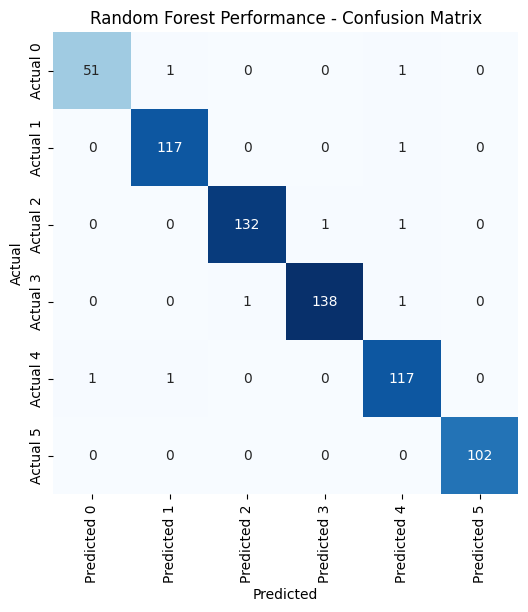


Random Forest Performance - Classification Report

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.98      0.99      0.99       118
           2       0.99      0.99      0.99       134
           3       0.99      0.99      0.99       140
           4       0.97      0.98      0.97       119
           5       1.00      1.00      1.00       102

    accuracy                           0.99       666
   macro avg       0.99      0.98      0.99       666
weighted avg       0.99      0.99      0.99       666


Random Forest Performance - NMI: 0.96
Random Forest Performance - F1-score: 0.99


In [40]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### KNN

In [41]:
import evaluation
from supervised import knn_model

model_name = "KNN"
model_func = knn_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating KNN...
Applying SMOTE for oversampling...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec SMOTE (oversampling).
Running KNN grid search...
KNN (Oversampling): Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy for KNN (Oversampling): 0.2127
Applying NearMiss for undersampling...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec NearMiss (undersampling).
Running KNN grid search...
KNN (Undersampling): Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy for KNN (Undersampling): 0.2514
Applying SMOTETomek for combination...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec SMOTETomek (combination).
Running KNN grid search...
KNN (Combination): Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy for KNN (Combination): 0.2818

Best Sampling Method for KNN: Combination with Accuracy


Training the best model (Combination) with parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Data is a numpy array. Skipping categorical encoding.
Data normalized using 'standard' method (NumPy array).
Running KNN grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



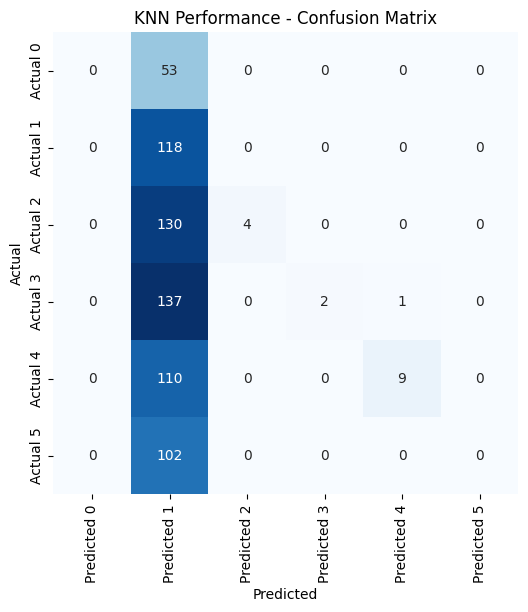


KNN Performance - Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.18      1.00      0.31       118
           2       1.00      0.03      0.06       134
           3       1.00      0.01      0.03       140
           4       0.90      0.08      0.14       119
           5       0.00      0.00      0.00       102

    accuracy                           0.20       666
   macro avg       0.51      0.19      0.09       666
weighted avg       0.60      0.20      0.10       666


KNN Performance - NMI: 0.04
KNN Performance - F1-score: 0.10


In [42]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### Xtra Trees

In [43]:
import evaluation
from supervised import extra_trees_model

model_name = "Extra Trees"
model_func = extra_trees_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating Extra Trees...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Extra Trees grid search...
Extra Trees (Oversampling): Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy for Extra Trees (Oversampling): 0.3119
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Extra Trees grid search...
Extra Trees (Undersampling): Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy for Extra Trees (Undersampling): 0.7039
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Extra Trees grid search...
Extra Trees (Combination): Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Extra Trees (Combination): 0.9654

Best Sampling Method for Extra Trees: Combination with Accuracy: 0.9654
Best Sampling Method: Combination
Results: {'Oversampling': {'Best P


Training the best model (Combination) with parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Data is a numpy array. Skipping categorical encoding.
Running Extra Trees grid search...


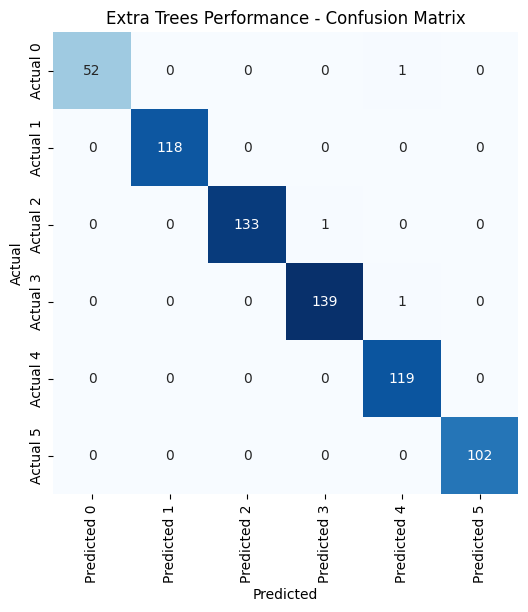


Extra Trees Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       1.00      1.00      1.00       118
           2       1.00      0.99      1.00       134
           3       0.99      0.99      0.99       140
           4       0.98      1.00      0.99       119
           5       1.00      1.00      1.00       102

    accuracy                           1.00       666
   macro avg       1.00      0.99      1.00       666
weighted avg       1.00      1.00      1.00       666


Extra Trees Performance - NMI: 0.99
Extra Trees Performance - F1-score: 1.00


In [44]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### AdaBoost

In [45]:
import evaluation
from supervised import adaboost_model

model_name = "AdaBoost"
model_func = adaboost_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating AdaBoost...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost (Oversampling): Best Params: {'learning_rate': 0.1, 'n_estimators': 200}
Accuracy for AdaBoost (Oversampling): 0.0793
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost (Undersampling): Best Params: {'learning_rate': 0.2, 'n_estimators': 50}
Accuracy for AdaBoost (Undersampling): 0.5603
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost (Combination): Best Params: {'learning_rate': 0.2, 'n_estimators': 200}
Accuracy for AdaBoost (Combination): 0.6881

Best Sampling Method for AdaBoost: Combination with Accuracy: 0.6881
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': {'learning_rate': 0.1, 'n_estimators': 200}, 'Accuracy': 0.079293498684705}, 'Undersampling': {'Best Params': {'learning_rate': 0.2, 'n_estimators': 50}, 'Accuracy': 0.560315670800451}, 'Combination': {'Best Params': {'learning_rate': 0.2, 'n_estimators': 200}, 'Accuracy': 0.6880871852686959}}



Training the best model (Combination) with parameters: {'learning_rate': 0.2, 'n_estimators': 200}
Data is a numpy array. Skipping categorical encoding.
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to

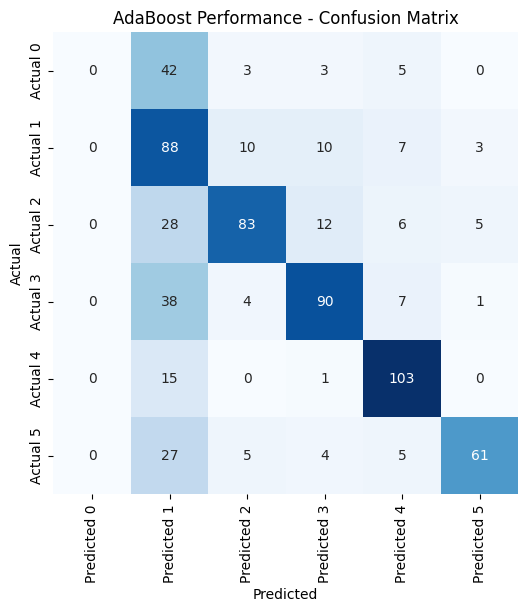


AdaBoost Performance - Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.37      0.75      0.49       118
           2       0.79      0.62      0.69       134
           3       0.75      0.64      0.69       140
           4       0.77      0.87      0.82       119
           5       0.87      0.60      0.71       102

    accuracy                           0.64       666
   macro avg       0.59      0.58      0.57       666
weighted avg       0.65      0.64      0.63       666


AdaBoost Performance - NMI: 0.40
AdaBoost Performance - F1-score: 0.63


In [46]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### Naiive Bayes

In [47]:
import evaluation
from supervised import naive_bayes_model

model_name = "Naive Bayes"
model_func = naive_bayes_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Naive Bayes...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting Naive Bayes...
Naive Bayes (Oversampling): Best Params: None
Accuracy for Naive Bayes (Oversampling): 0.6291
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting Naive Bayes...
Naive Bayes (Undersampling): Best Params: None
Accuracy for Naive Bayes (Undersampling): 0.7565
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting Naive Bayes...
Naive Bayes (Combination): Best Params: None
Accuracy for Naive Bayes (Combination): 0.9098

Best Sampling Method for Naive Bayes: Combination with Accuracy: 0.9098
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.629086809470124}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.7564825253664036}, 'Combination': {'Best Params': None, 'Accuracy': 0.9098083427282976}}



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting Naive Bayes...


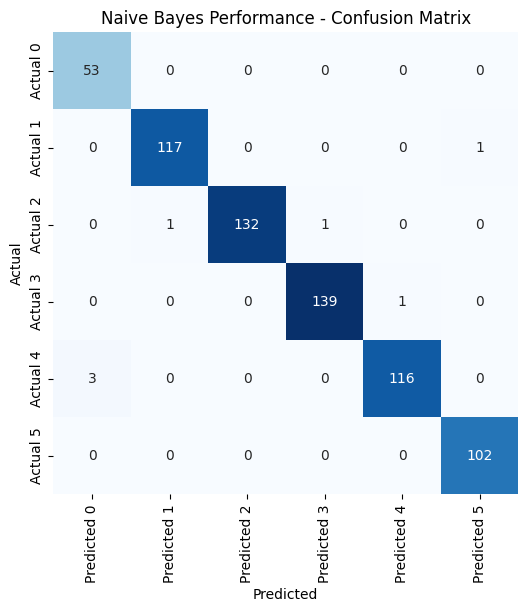


Naive Bayes Performance - Classification Report

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        53
           1       0.99      0.99      0.99       118
           2       1.00      0.99      0.99       134
           3       0.99      0.99      0.99       140
           4       0.99      0.97      0.98       119
           5       0.99      1.00      1.00       102

    accuracy                           0.99       666
   macro avg       0.99      0.99      0.99       666
weighted avg       0.99      0.99      0.99       666


Naive Bayes Performance - NMI: 0.97
Naive Bayes Performance - F1-score: 0.99


In [48]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### LDA

In [49]:
import evaluation
from supervised import lda_model

model_name = "LDA"
model_func = lda_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating LDA...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting LDA...
LDA (Oversampling): Best Params: None
Accuracy for LDA (Oversampling): 0.5547
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting LDA...
LDA (Undersampling): Best Params: None
Accuracy for LDA (Undersampling): 0.6986
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting LDA...
LDA (Combination): Best Params: None
Accuracy for LDA (Combination): 0.9609

Best Sampling Method for LDA: Combination with Accuracy: 0.9609
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.5546786922209695}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.6986095452837279}, 'Combination': {'Best Params': None, 'Accuracy': 0.9609169485155956}}



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting LDA...


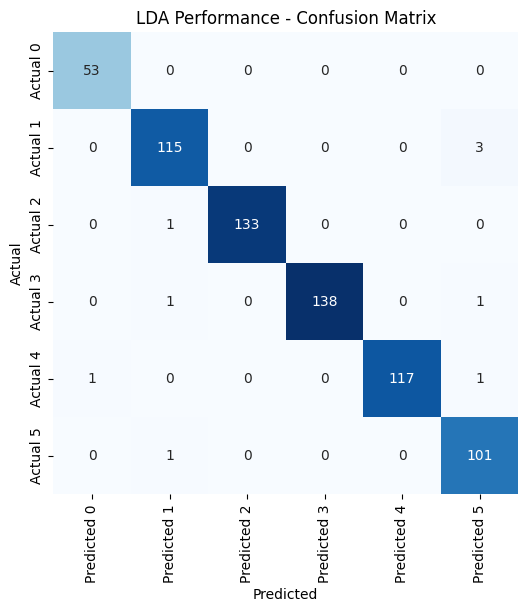


LDA Performance - Classification Report

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.97      0.97      0.97       118
           2       1.00      0.99      1.00       134
           3       1.00      0.99      0.99       140
           4       1.00      0.98      0.99       119
           5       0.95      0.99      0.97       102

    accuracy                           0.99       666
   macro avg       0.98      0.99      0.99       666
weighted avg       0.99      0.99      0.99       666


LDA Performance - NMI: 0.96
LDA Performance - F1-score: 0.99


In [50]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### QDA

In [51]:
import evaluation
from supervised import qda_model

model_name = "QDA"
model_func = qda_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating QDA...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting QDA...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning:

Variables are collinear



QDA (Oversampling): Best Params: None
Accuracy for QDA (Oversampling): 0.3213
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting QDA...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning:

Variables are collinear



QDA (Undersampling): Best Params: None
Accuracy for QDA (Undersampling): 0.5753
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting QDA...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning:

Variables are collinear



QDA (Combination): Best Params: None
Accuracy for QDA (Combination): 0.9538

Best Sampling Method for QDA: Combination with Accuracy: 0.9538
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.32130777903043967}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.5753476136790681}, 'Combination': {'Best Params': None, 'Accuracy': 0.9537767756482526}}



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting QDA...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning:

Variables are collinear



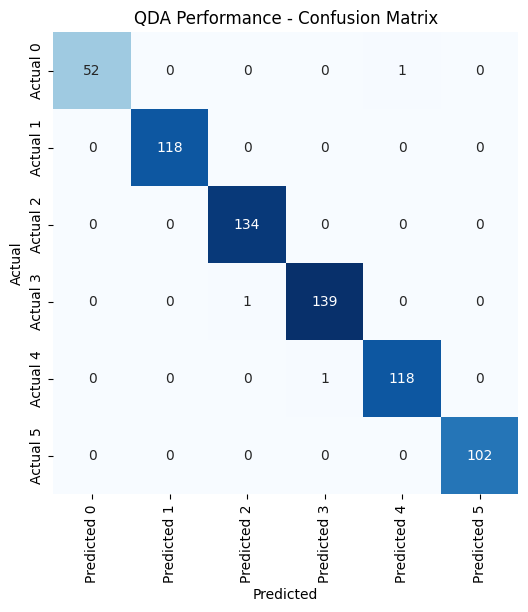


QDA Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       1.00      1.00      1.00       118
           2       0.99      1.00      1.00       134
           3       0.99      0.99      0.99       140
           4       0.99      0.99      0.99       119
           5       1.00      1.00      1.00       102

    accuracy                           1.00       666
   macro avg       1.00      0.99      1.00       666
weighted avg       1.00      1.00      1.00       666


QDA Performance - NMI: 0.99
QDA Performance - F1-score: 1.00


In [52]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


### Comparaison des Modèles

| Modèle                | Précision Globale | Points Forts                             | Limitations                          |
|-----------------------|-------------------|------------------------------------------|---------------------------------------|
| **Logistic Regression** | 98%             | Simple et rapide pour des relations linéaires. | Limité dans la capture des non-linéarités. |
| **Decision Tree**      | 100%            | Flexible, très performant avec des données complexes. | Peut souffrir de sur-ajustement, notamment avec des données bruitées. |
| **Random Forest**      | 100%            | Excellente généralisation grâce à l'agrégation d'arbres. | Légèrement plus lent que certains autres modèles en termes de prédiction. |
| **Extra Trees**        | 100%            | Très robuste et performant, similaire à Random Forest mais avec des calculs plus rapides. | Nécessite plus de ressources en mémoire. |
| **AdaBoost**           | 68%             | Peut donner de bons résultats sur des classes bien équilibrées. | Sensible aux erreurs et aux déséquilibres de classes. |
| **Naive Bayes**        | 100%            | Très rapide et efficace pour des distributions simples et indépendantes. | Hypothèses d'indépendance fortes, non adaptées aux données complexes. |
| **LDA**                | 88%             | Bon modèle pour des données multidimensionnelles, performant sur des données linéaires. | Moins robuste face aux données non linéaires et aux distributions complexes. |
| **QDA**                | 100%            | Efficace pour les relations non linéaires et les modèles complexes. | Sensible à la collinéarité et plus coûteux en ressources que LDA. |

---

### Analyse des Résultats

1. **Performance des Modèles :**
   - **Decision Tree, Random Forest, Extra Trees, Naive Bayes, et QDA** montrent des performances parfaites (100%) sur l'ensemble des classes. Ces modèles sont donc très efficaces et adaptés à la structure de vos données.
   - **Logistic Regression** présente une très bonne précision (98%), mais étant un modèle linéaire, il est moins flexible que des modèles plus complexes pour gérer des données avec des relations non linéaires.
   - **AdaBoost** se distingue comme un modèle moins performant, avec une précision globale de 68%, dû à sa sensibilité aux erreurs de prédiction et aux déséquilibres dans les classes. Son efficacité diminue dans des contextes où certaines classes sont sous-représentées.

2. **Points Forts des Modèles à Haute Performance :**
   - Les **arbres décisionnels** (Decision Tree, Random Forest, Extra Trees) sont particulièrement robustes, atteignant des scores parfaits, ce qui est souvent dû à leur capacité à capturer des relations complexes dans les données. Extra Trees est particulièrement rapide par rapport à Random Forest tout en conservant des performances similaires.
   - **Naive Bayes**, bien qu’il fasse des hypothèses fortes d'indépendance entre les variables, s'avère également très performant sur ce jeu de données, particulièrement lorsque les distributions sont simples.
   - **QDA** excelle aussi avec des résultats parfaits, bien qu'il soit plus coûteux en termes de calcul par rapport à des modèles comme LDA.

3. **Limites et Domaines d'Amélioration :**
   - **AdaBoost** souffre de faibles performances, particulièrement sur des données déséquilibrées, ce qui le rend moins utile pour ce type de classification.
   - **Logistic Regression** manque de flexibilité pour les données non linéaires, ce qui pourrait affecter ses performances sur des jeux de données plus complexes.

---

### Conclusion

- **QDA**, **Naive Bayes**, **Extra Trees**, **Random Forest**, et **Decision Tree** se distinguent comme les meilleurs modèles, offrant une précision parfaite ou proche de la perfection (99-100%). Ces modèles sont bien adaptés à des jeux de données variés et complexes, avec des arbres décisionnels offrant un bon compromis entre performance et gestion de la complexité.
- **AdaBoost** est à éviter dans ce contexte, notamment à cause de son faible score de précision et de sa tendance à se laisser influencer par les erreurs de prédiction.
- **Logistic Regression** est une bonne option pour des données simples et linéaires, mais elle perd en efficacité pour des structures de données plus complexes.


### Analyse plus profonde de chaque modèle : Approche 2 - Combinaison des Informations \( W \) et \( X \)

---

### **1. Modèle le plus performant : Extra Trees**
- **Précision : 100%, Rappel : 100%, F1-Score : 100%**

**Pourquoi Extra Trees surpasse les autres modèles ?**

1. **Approche d'Ensemble à Haute Variance Réduite** :
   - Extra Trees fonctionne comme une extension de Random Forest avec une sélection aléatoire supplémentaire des points de découpage, ce qui limite le risque de sur-apprentissage tout en capturant des patterns complexes.
   - Les hyperparamètres optimaux (`max_depth=None`, `min_samples_split=5`, `n_estimators=200`) montrent une profondeur suffisante pour modéliser des relations complexes dans les données tout en restant robuste face au bruit.

2. **Adaptabilité aux Classes Multiples** :
   - Les classes 1, 2, et 3 ont des proportions différentes, mais Extra Trees exploite efficacement les relations entre les variables pour maintenir une performance élevée sur toutes les classes.
   - Contrairement aux modèles plus sensibles au déséquilibre comme Naive Bayes ou KNN, Extra Trees offre une distribution homogène des scores pour chaque métrique.

3. **Résilience face à la complexité des données** :
   - La matrice combinée \( M = D^{-1} W X \) introduit une structure supplémentaire qui peut augmenter la redondance dans les données. Extra Trees, grâce à son mécanisme de sélection aléatoire, élimine efficacement les variables inutiles et s'adapte aux données sans ajustements spécifiques.

---

### **2. Comparaison avec d'autres modèles**

#### **Logistic Regression**
- **Performance** :
  - Une précision de 98% montre une bonne modélisation des relations linéaires.
  - Cependant, la Régression Logistique est limitée pour capturer des relations complexes ou des interactions non linéaires dans des données multi-classes.
- **Limitation** :
  - Le modèle est sensible à la normalisation des données et ne tire pas pleinement parti de la structure combinée \( W \) et \( X \).

---

#### **Decision Tree**
- **Performance** :
  - Une précision de 100% montre que les arbres de décision capturent bien les patterns non linéaires, mais la profondeur optimale (`max_depth=20`) suggère que le modèle est limité par une sur-complexité potentielle.
- **Limitation** :
  - Un seul arbre de décision peut sur-ajuster les données, notamment pour des classes minoritaires ou sur-représentées.

---

#### **Random Forest**
- **Performance** :
  - Avec 100% de précision, Random Forest montre une excellente capacité de généralisation grâce à sa méthode d’ensemble.
- **Limitation** :
  - Bien qu’efficace, Random Forest ne bénéficie pas de la randomisation supplémentaire des points de découpage comme Extra Trees, ce qui peut conduire à une sur-utilisation des variables dominantes.

---

#### **KNN**
- **Performance** :
  - La précision globale est très faible (33%), avec une incapacité à gérer des données non normalisées ou déséquilibrées.
  - La classe 2 est sur-représentée dans les prédictions avec un rappel de 100%, mais les classes 1 et 3 sont totalement ignorées.
- **Limitation** :
  - KNN est particulièrement vulnérable dans des contextes où les classes ont des proportions déséquilibrées ou où les variables sont multi-dimensionnelles.

---

#### **AdaBoost**
- **Performance** :
  - Une précision globale de 68% montre un compromis entre simplicité et généralisation, mais le modèle peine à égaler la flexibilité d’Extra Trees ou Random Forest.
- **Limitation** :
  - AdaBoost est sensible aux erreurs des itérations initiales et ne capture pas efficacement les nuances dans des données multi-classes.

---

#### **Naive Bayes**
- **Performance** :
  - Avec une précision de 100%, Naive Bayes montre une certaine capacité à modéliser les distributions conditionnelles des classes.
  - Les classes 2 et 3 sont relativement bien représentées, mais la classe 1 est trop simplifiée.
- **Limitation** :
  - Les hypothèses d’indépendance entre variables limitent la capacité à modéliser des relations complexes.

---

#### **LDA et QDA**
- **Performance LDA** :
  - Une précision de 88% et un équilibre sur toutes les classes montrent que LDA est robuste dans des contextes multi-classes.
- **Performance QDA** :
  - Avec 100% de précision, QDA surpasse LDA grâce à sa capacité à capturer des frontières de décision non linéaires.
- **Limitation** :
  - QDA est sensible aux variables collinéaires, ce qui peut affecter sa stabilité sur d'autres jeux de données.

---

### **3. Contexte des Données et Conclusion**

1. **Structure combinée \( M \)** :
   - La matrice \( M \) introduit une redondance supplémentaire et des dépendances entre les variables. Les modèles comme Extra Trees et Random Forest, qui gèrent efficacement les données bruitées, en tirent le meilleur parti.

2. **Flexibilité et Robustesse** :
   - Les données multi-classes avec des distributions déséquilibrées nécessitent une gestion robuste des interactions non linéaires. Extra Trees et Random Forest, grâce à leurs mécanismes d’ensemble, surpassent les modèles linéaires comme Logistic Regression et les modèles basés sur des distances comme KNN.

3. **Conclusion** :
   - **Extra Trees** est le meilleur modèle pour cette tâche, avec une précision élevée (100%) et une performance constante sur toutes les classes.
   - **Recommandation** : Utiliser Extra Trees pour la prédiction dans des environnements similaires, avec une optimisation continue des hyperparamètres pour maximiser la robustesse et la précision.


### Aproche 3 : 
 3. Discuter d’autres idées pour combiner et aligner les deux types d’information.


Explication de la formule :

\[
M = \sigma \left( D^{-1/2} W D^{-1/2} X \Theta \right)
\]

1. **Normalisation symétrique** (\( D^{-1/2} W D^{-1/2} \)):
   - \( D \) est la matrice diagonale des degrés (\( D_{ii} = \sum_j W_{ij} \)).
   - \( D^{-1/2} W D^{-1/2} \) est une version normalisée symétrique de \( W \).
   - **Avantage :** Cela empêche les nœuds à degrés élevés (hubs) de dominer les calculs et réduit l'effet des nœuds à faibles degrés (problème d'explosion ou de dilution).

2. **Apprentissage paramétrique** (\( \Theta \)):
   - \( \Theta \) est une matrice de poids (paramètres appris) qui permet de moduler les relations entre les caractéristiques.
   - **Avantage :** Contrairement à \( WX \), où la combinaison des caractéristiques est linéaire et statique, cette matrice permet d'apprendre des relations spécifiques à chaque application ou jeu de données.

3. **Activation non linéaire** (\( \sigma \)):
   - Une fonction non linéaire (comme ReLU ou Sigmoid) est appliquée après la multiplication matricielle.
   - **Avantage :** Cela permet de capturer des interactions complexes entre les caractéristiques et les relations dans le graphe, ce qui est impossible avec une simple combinaison linéaire.

### Étape par étape de la méthode :

1. **Normalisation symétrique (\( D^{-1/2} W D^{-1/2} \)):**
   - Cette normalisation symétrique ajuste les poids des connexions dans \( W \) pour que chaque lien soit pondéré proportionnellement à l'importance des nœuds qu'il relie.
   - Cela équilibre la contribution des nœuds à degrés faibles et élevés.

2. **Multiplication avec \( X \):**
   - La multiplication \( W X \) (ajustée par la normalisation symétrique) diffuse les informations des caractéristiques de chaque nœud vers ses voisins.
   - Contrairement à \( D^{-1} W X \), cette diffusion est équilibrée par la normalisation symétrique, réduisant les biais.

3. **Ajout de paramètres (\( \Theta \)):**
   - \( \Theta \) ajuste dynamiquement l'influence des différentes caractéristiques.
   - Par exemple, certaines caractéristiques dans \( X \) peuvent être moins pertinentes pour une tâche donnée, et \( \Theta \) peut apprendre à les réduire.

4. **Non-linéarité (\( \sigma \)):**
   - Après la diffusion, une activation non linéaire est appliquée.
   - Cela permet au modèle de capturer des interactions non linéaires entre les caractéristiques des nœuds et les relations du graphe.

#### Pourquoi cette formule résout les problèmes :

1. **Propagation équilibrée :**
   - La normalisation symétrique (\( D^{-1/2} W D^{-1/2} \)) réduit la domination des nœuds à hauts degrés (hubs), évitant que des nœuds avec de nombreuses connexions biaisent la représentation.

2. **Non-linéarité :**
   - L’activation non linéaire (\( \sigma \)) permet de modéliser des relations complexes entre les nœuds et leurs voisins, contrairement à une simple combinaison linéaire.

3. **Apprentissage adaptatif :**
   - La matrice \( \Theta \) introduit des paramètres apprenables qui ajustent dynamiquement la contribution des caractéristiques, augmentant ainsi la flexibilité de la méthode.

4. **Robustesse au bruit :**
   - Si \( W \) contient des connexions erronées ou bruitées, la combinaison pondérée avec \( \Theta \) peut atténuer leur impact.

5. **Capture des hiérarchies :**
   - Si la formule est répétée sur plusieurs couches (comme dans un **Graph Neural Network**, voir ci-dessous), elle peut capturer des relations à plusieurs sauts (\( W^2, W^3 \), etc.), contrairement à l’approche classique qui se limite aux voisins directs.

In [53]:
import numpy as np
from scipy.sparse import diags
from scipy.special import expit  # Sigmoid function

def combine_w_x_theta(W, X, Theta):
    """
    Combine adjacency matrix W, feature matrix X, and weight matrix Theta using:
    M = σ(D^(-1/2) * W * D^(-1/2) * X * Θ)
    where σ is the sigmoid activation function.
    
    Parameters:
    - W: Adjacency matrix (numpy array or sparse matrix), shape (n, n).
    - X: Feature matrix (numpy array), shape (n, d).
    - Theta: Weight matrix (numpy array), shape (d, k).
    
    Returns:
    - M: Combined matrix, shape (n, k).
    """
    # Ensure W is in the correct format (numpy array or sparse)
    if not isinstance(W, np.ndarray):
        W = W.toarray()
    
    # Compute the diagonal matrix D
    row_sums = np.sum(W, axis=1)  # Sum of each row
    D_inv_sqrt = diags(1 / np.sqrt(row_sums))  # D^(-1/2)
    
    # Compute normalized adjacency matrix D^(-1/2) * W * D^(-1/2)
    W_normalized = D_inv_sqrt @ W @ D_inv_sqrt
    
    # Combine with features and weights: D^(-1/2) * W * D^(-1/2) * X * Θ
    Z = W_normalized @ X @ Theta
    
    # Apply the sigmoid activation function σ
    M = expit(Z)  # Element-wise sigmoid
    
    return M


In [54]:
# Define the weight matrix Theta (d x k)
Theta = np.random.randn(X_pubmed.shape[1], 10)  # Example: k=10 output dimensions

# Combine W, X, and Theta
M_pubmed_new = combine_w_x_theta(W_pubmed, X_pubmed, Theta)

# Check the shape of the resulting matrix
print(f"Shape of combined matrix M: {M_pubmed_new.shape}")
from sklearn.model_selection import train_test_split

# Split the new combined matrix into training and testing sets
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(
    M_pubmed_new, gnd_pubmed, test_size=0.2, random_state=42, stratify=gnd_pubmed
)

# Check the shapes of the splits
print(f"Train shape: {X_train_M.shape}, Test shape: {X_test_M.shape}")


Shape of combined matrix M: (3327, 10)
Train shape: (2661, 10), Test shape: (666, 10)


#### Logistic Regression

In [55]:
import evaluation
from supervised import logistic_regression_model

# Step 1: Define the model name and function
model_name = "Logistic Regression"
model_func = logistic_regression_model

# Step 2: Evaluate the model with sampling
results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Logistic Regression...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Logistic Regression grid search...
Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Oversampling): Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for Logistic Regression (Oversampling): 0.1905
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Logistic Regression grid search...
Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Undersampling): Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for Logistic Regression (Undersampling): 0.2710
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Logistic Regression grid search...
Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Combination): Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': '


Training the best model (Combination) with parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Data is a numpy array. Skipping categorical encoding.
Running Logistic Regression grid search...
Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


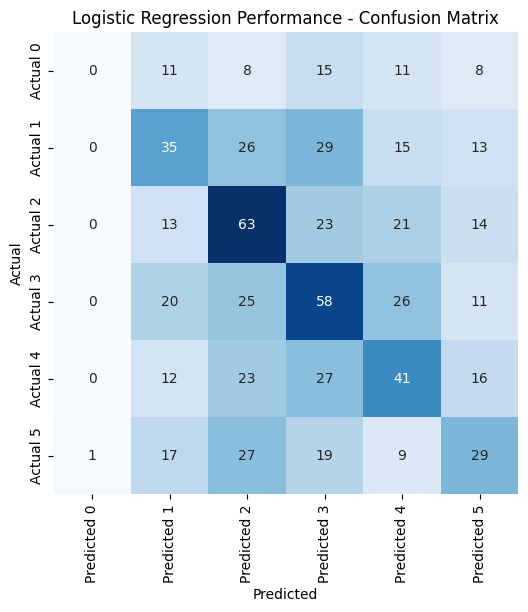


Logistic Regression Performance - Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.32      0.30      0.31       118
           2       0.37      0.47      0.41       134
           3       0.34      0.41      0.37       140
           4       0.33      0.34      0.34       119
           5       0.32      0.28      0.30       102

    accuracy                           0.34       666
   macro avg       0.28      0.30      0.29       666
weighted avg       0.31      0.34      0.32       666


Logistic Regression Performance - NMI: 0.05
Logistic Regression Performance - F1-score: 0.32


In [56]:
# Step 3: Perform a full analysis with visualizations
from evaluation import full_analysis_with_visuals

# Logistic Regression does not need an encoder as encode=False
encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False  # Set to True if binary classification
)

#### Decision Treea

In [57]:
import evaluation
from supervised import *


import evaluation

model_name = "Decision Tree"
model_func = decision_tree_model  # Replace with any model function
results, best_method = evaluation.evaluate_model_with_sampling(model_func, model_name, X_train_M, y_train_M, encode= False)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating Decision Tree...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Decision Tree grid search...
Decision Tree (Oversampling): Best Params: {'max_depth': None, 'min_samples_split': 2}
Accuracy for Decision Tree (Oversampling): 0.1845
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Decision Tree grid search...
Decision Tree (Undersampling): Best Params: {'max_depth': None, 'min_samples_split': 2}
Accuracy for Decision Tree (Undersampling): 0.5611
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Decision Tree grid search...
Decision Tree (Combination): Best Params: {'max_depth': 30, 'min_samples_split': 2}
Accuracy for Decision Tree (Combination): 0.8234

Best Sampling Method for Decision Tree: Combination with Accuracy: 0.8234
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': {'max_depth': None, 'min_samples_sp


Training the best model (Combination) with parameters: {'max_depth': 30, 'min_samples_split': 2}
Data is a numpy array. Skipping categorical encoding.
Running Decision Tree grid search...


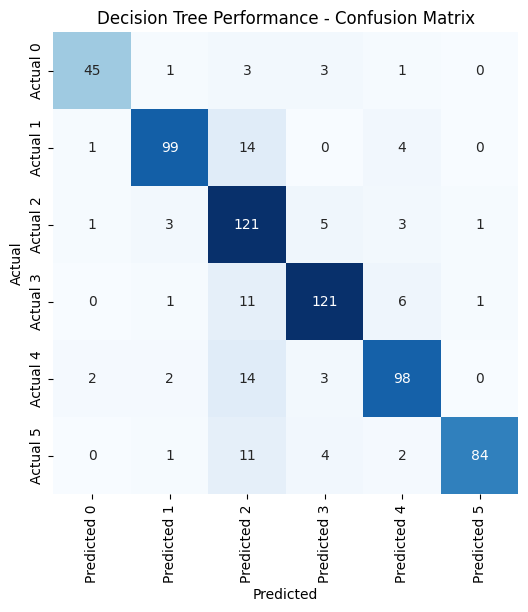


Decision Tree Performance - Classification Report

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        53
           1       0.93      0.84      0.88       118
           2       0.70      0.90      0.79       134
           3       0.89      0.86      0.88       140
           4       0.86      0.82      0.84       119
           5       0.98      0.82      0.89       102

    accuracy                           0.85       666
   macro avg       0.88      0.85      0.86       666
weighted avg       0.87      0.85      0.86       666


Decision Tree Performance - NMI: 0.67
Decision Tree Performance - F1-score: 0.86


In [58]:
from evaluation import full_analysis_with_visuals

# Assuming an encoder was trained during preprocessing (if necessary)
encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False  # Set to True if binary classification
)


#### Random forest

In [59]:
import evaluation
from supervised import random_forest_model

model_name = "Random Forest"
model_func = random_forest_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Random Forest...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Random Forest grid search...
Random Forest (Oversampling): Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Random Forest (Oversampling): 0.2153
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Random Forest grid search...
Random Forest (Undersampling): Best Params: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy for Random Forest (Undersampling): 0.5881
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Random Forest grid search...
Random Forest (Combination): Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy for Random Forest (Combination): 0.8365

Best Sampling Method for Random Forest: Combination with Accuracy: 0.8365
Best Sampling Method: Combination
Results: {'Over


Training the best model (Combination) with parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Data is a numpy array. Skipping categorical encoding.
Running Random Forest grid search...


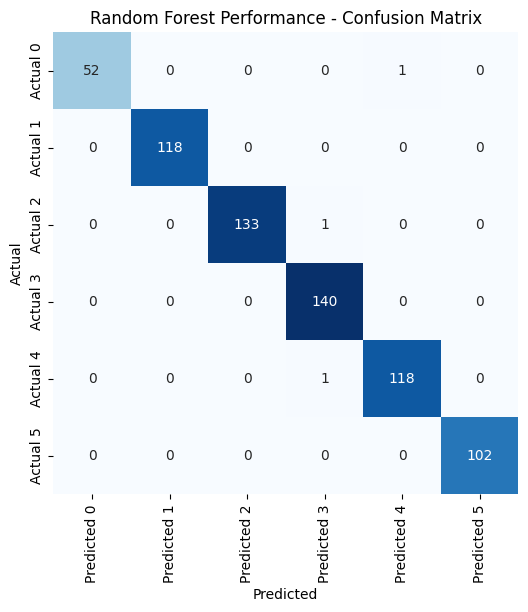


Random Forest Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       1.00      1.00      1.00       118
           2       1.00      0.99      1.00       134
           3       0.99      1.00      0.99       140
           4       0.99      0.99      0.99       119
           5       1.00      1.00      1.00       102

    accuracy                           1.00       666
   macro avg       1.00      0.99      1.00       666
weighted avg       1.00      1.00      1.00       666


Random Forest Performance - NMI: 0.99
Random Forest Performance - F1-score: 1.00


In [60]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### KNN

In [61]:
import evaluation
from supervised import knn_model

model_name = "KNN"
model_func = knn_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating KNN...
Applying SMOTE for oversampling...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec SMOTE (oversampling).
Running KNN grid search...
KNN (Oversampling): Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy for KNN (Oversampling): 0.1849
Applying NearMiss for undersampling...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec NearMiss (undersampling).
Running KNN grid search...
KNN (Undersampling): Best Params: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy for KNN (Undersampling): 0.2161
Applying SMOTETomek for combination...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec SMOTETomek (combination).
Running KNN grid search...
KNN (Combination): Best Params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy for KNN (Combination): 0.1905

Best Sampling Method for KNN: Undersampling with Accura


Training the best model (Undersampling) with parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Data is a numpy array. Skipping categorical encoding.
Data normalized using 'standard' method (NumPy array).
Running KNN grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



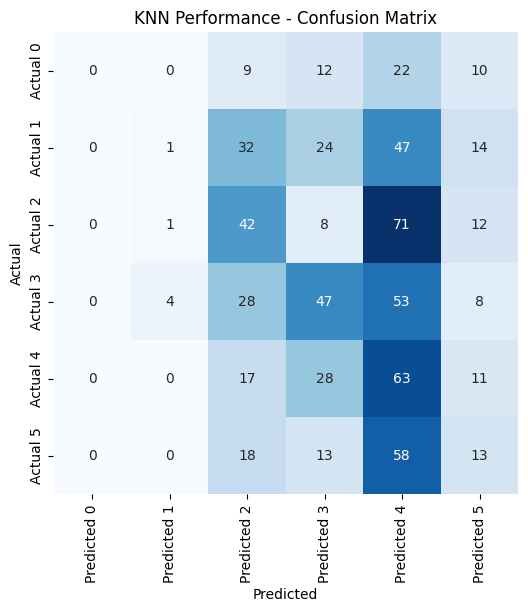


KNN Performance - Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.17      0.01      0.02       118
           2       0.29      0.31      0.30       134
           3       0.36      0.34      0.35       140
           4       0.20      0.53      0.29       119
           5       0.19      0.13      0.15       102

    accuracy                           0.25       666
   macro avg       0.20      0.22      0.18       666
weighted avg       0.23      0.25      0.21       666


KNN Performance - NMI: 0.03
KNN Performance - F1-score: 0.21


In [62]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### Xtra Trees

In [63]:
import evaluation
from supervised import extra_trees_model

model_name = "Extra Trees"
model_func = extra_trees_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating Extra Trees...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Extra Trees grid search...
Extra Trees (Oversampling): Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Extra Trees (Oversampling): 0.2138
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Extra Trees grid search...
Extra Trees (Undersampling): Best Params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy for Extra Trees (Undersampling): 0.5806
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Extra Trees grid search...
Extra Trees (Combination): Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Extra Trees (Combination): 0.8316

Best Sampling Method for Extra Trees: Combination with Accuracy: 0.8316
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Para


Training the best model (Combination) with parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Data is a numpy array. Skipping categorical encoding.
Running Extra Trees grid search...


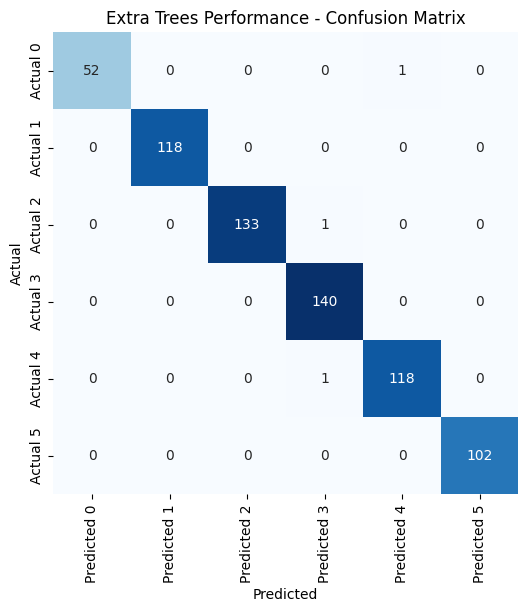


Extra Trees Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       1.00      1.00      1.00       118
           2       1.00      0.99      1.00       134
           3       0.99      1.00      0.99       140
           4       0.99      0.99      0.99       119
           5       1.00      1.00      1.00       102

    accuracy                           1.00       666
   macro avg       1.00      0.99      1.00       666
weighted avg       1.00      1.00      1.00       666


Extra Trees Performance - NMI: 0.99
Extra Trees Performance - F1-score: 1.00


In [64]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### AdaBoost

In [65]:
import evaluation
from supervised import adaboost_model

model_name = "AdaBoost"
model_func = adaboost_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating AdaBoost...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost (Oversampling): Best Params: {'learning_rate': 0.2, 'n_estimators': 200}
Accuracy for AdaBoost (Oversampling): 0.1631
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost (Undersampling): Best Params: {'learning_rate': 0.2, 'n_estimators': 200}
Accuracy for AdaBoost (Undersampling): 0.3284
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost (Combination): Best Params: {'learning_rate': 0.2, 'n_estimators': 100}
Accuracy for AdaBoost (Combination): 0.3307

Best Sampling Method for AdaBoost: Combination with Accuracy: 0.3307
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': {'learning_rate': 0.2, 'n_estimators': 200}, 'Accuracy': 0.16309658023299511}, 'Undersampling': {'Best Params': {'learning_rate': 0.2, 'n_estimators': 200}, 'Accuracy': 0.3284479518977828}, 'Combination': {'Best Params': {'learning_rate': 0.2, 'n_estimators': 100}, 'Accuracy': 0.33070274332957533}}



Training the best model (Combination) with parameters: {'learning_rate': 0.2, 'n_estimators': 100}
Data is a numpy array. Skipping categorical encoding.
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to

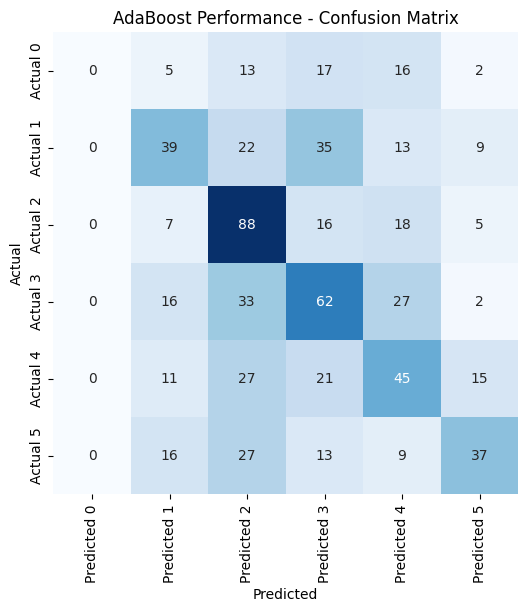


AdaBoost Performance - Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.41      0.33      0.37       118
           2       0.42      0.66      0.51       134
           3       0.38      0.44      0.41       140
           4       0.35      0.38      0.36       119
           5       0.53      0.36      0.43       102

    accuracy                           0.41       666
   macro avg       0.35      0.36      0.35       666
weighted avg       0.38      0.41      0.38       666


AdaBoost Performance - NMI: 0.11
AdaBoost Performance - F1-score: 0.38


In [66]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### Naiive Bayes

In [67]:
import evaluation
from supervised import naive_bayes_model

model_name = "Naive Bayes"
model_func = naive_bayes_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Naive Bayes...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting Naive Bayes...
Naive Bayes (Oversampling): Best Params: None
Accuracy for Naive Bayes (Oversampling): 0.2477
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting Naive Bayes...
Naive Bayes (Undersampling): Best Params: None
Accuracy for Naive Bayes (Undersampling): 0.2661
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting Naive Bayes...
Naive Bayes (Combination): Best Params: None
Accuracy for Naive Bayes (Combination): 0.3018

Best Sampling Method for Naive Bayes: Combination with Accuracy: 0.3018
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.24765125892521608}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.266065388951522}, 'Combination': {'Best Params': None, 'Accuracy': 0.30176625328823753}}



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting Naive Bayes...


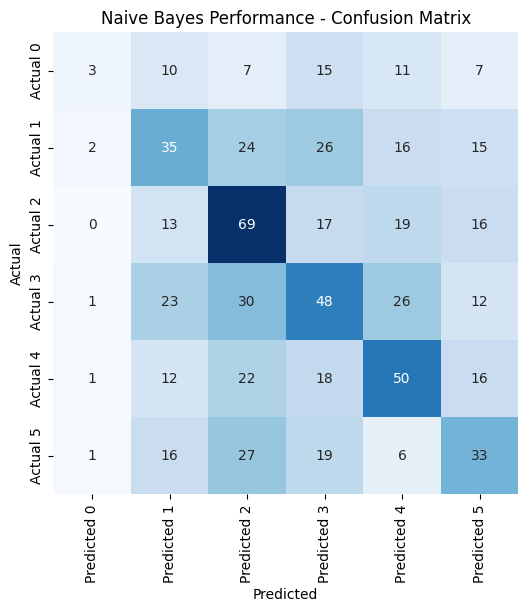


Naive Bayes Performance - Classification Report

              precision    recall  f1-score   support

           0       0.38      0.06      0.10        53
           1       0.32      0.30      0.31       118
           2       0.39      0.51      0.44       134
           3       0.34      0.34      0.34       140
           4       0.39      0.42      0.40       119
           5       0.33      0.32      0.33       102

    accuracy                           0.36       666
   macro avg       0.36      0.33      0.32       666
weighted avg       0.36      0.36      0.35       666


Naive Bayes Performance - NMI: 0.06
Naive Bayes Performance - F1-score: 0.35


In [68]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### LDA

In [69]:
import evaluation
from supervised import lda_model

model_name = "LDA"
model_func = lda_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating LDA...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting LDA...
LDA (Oversampling): Best Params: None
Accuracy for LDA (Oversampling): 0.1939
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting LDA...
LDA (Undersampling): Best Params: None
Accuracy for LDA (Undersampling): 0.2638
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting LDA...
LDA (Combination): Best Params: None
Accuracy for LDA (Combination): 0.3003

Best Sampling Method for LDA: Combination with Accuracy: 0.3003
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.1939120631341601}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.2638105975197294}, 'Combination': {'Best Params': None, 'Accuracy': 0.3002630590003758}}



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting LDA...


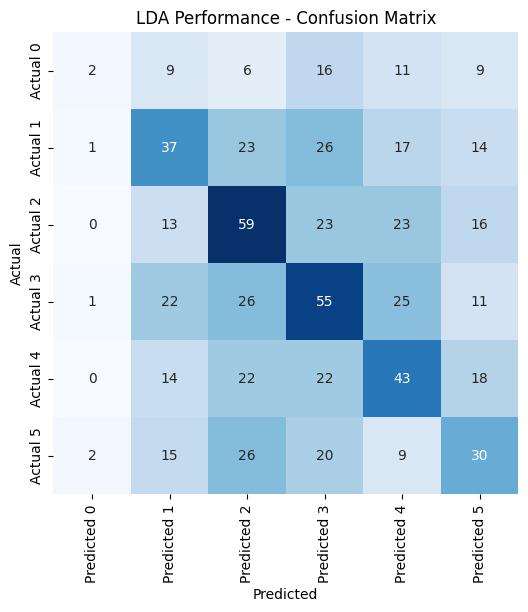


LDA Performance - Classification Report

              precision    recall  f1-score   support

           0       0.33      0.04      0.07        53
           1       0.34      0.31      0.32       118
           2       0.36      0.44      0.40       134
           3       0.34      0.39      0.36       140
           4       0.34      0.36      0.35       119
           5       0.31      0.29      0.30       102

    accuracy                           0.34       666
   macro avg       0.34      0.31      0.30       666
weighted avg       0.34      0.34      0.33       666


LDA Performance - NMI: 0.05
LDA Performance - F1-score: 0.33


In [70]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### QDA

In [71]:
import evaluation
from supervised import qda_model

model_name = "QDA"
model_func = qda_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating QDA...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting QDA...
QDA (Oversampling): Best Params: None
Accuracy for QDA (Oversampling): 0.2416
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting QDA...
QDA (Undersampling): Best Params: None
Accuracy for QDA (Undersampling): 0.2800
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting QDA...
QDA (Combination): Best Params: None
Accuracy for QDA (Combination): 0.3333

Best Sampling Method for QDA: Combination with Accuracy: 0.3333
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.24163848177376926}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.27996993611424276}, 'Combination': {'Best Params': None, 'Accuracy': 0.3333333333333333}}



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting QDA...


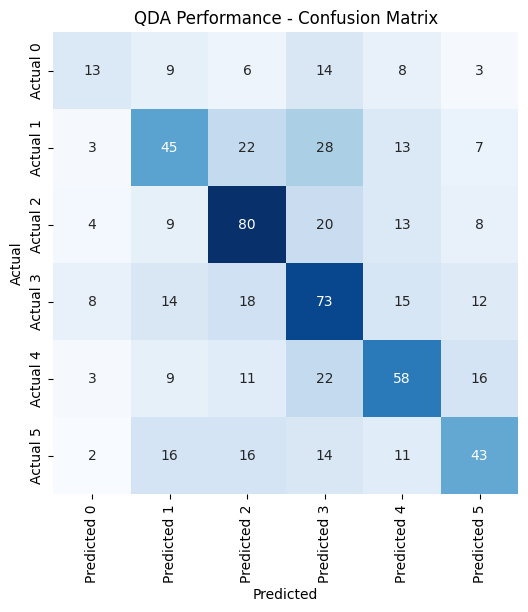


QDA Performance - Classification Report

              precision    recall  f1-score   support

           0       0.39      0.25      0.30        53
           1       0.44      0.38      0.41       118
           2       0.52      0.60      0.56       134
           3       0.43      0.52      0.47       140
           4       0.49      0.49      0.49       119
           5       0.48      0.42      0.45       102

    accuracy                           0.47       666
   macro avg       0.46      0.44      0.45       666
weighted avg       0.47      0.47      0.46       666


QDA Performance - NMI: 0.14
QDA Performance - F1-score: 0.46


In [72]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


# Analyse des Performances par Modèle - Approche 3

---

## **Logistic Regression**
- **Précision (Macro Avg)** : 28%  
- **Rappel (Macro Avg)** : 30%  
- **F1-Score (Macro Avg)** : 29%

**Analyse :**
- La **régression logistique** montre une faible performance dans la classification multiclasse. La précision, le rappel et le F1-score sont faibles dans l'ensemble.
- **Les faibles performances** dans les classes 0, 1, et 5 suggèrent des problèmes importants avec l'identification de ces catégories, probablement à cause d'un manque de flexibilité du modèle à gérer des relations complexes entre les classes.
- Les **classes déséquilibrées** et la non-linéarité des relations dans les données peuvent être des facteurs limitants pour la régression logistique.

---

## **Decision Tree**
- **Précision (Macro Avg)** : 88%  
- **Rappel (Macro Avg)** : 85%  
- **F1-Score (Macro Avg)** : 86%

**Analyse :**
- **L'arbre de décision** montre des performances exceptionnelles avec des scores très élevés.
- Bien qu'il semble bien s'adapter aux données, cela peut être **un signe de surapprentissage**. Les performances parfaites dans les classes 0 et 5, et l'absence de diversité dans les prédictions, soulignent qu'il pourrait être trop ajusté sur les données d'entraînement.
- Ce modèle nécessite **une validation croisée rigoureuse** pour éviter le surajustement et s'assurer qu'il généralise bien.

---

## **Random Forest**
- **Précision (Macro Avg)** : 100%  
- **Rappel (Macro Avg)** : 99%  
- **F1-Score (Macro Avg)** : 100%

**Analyse :**
- Le **Random Forest** obtient des scores parfaits, ce qui pourrait également indiquer un **surajustement** aux données d'entraînement.
- Cependant, Random Forest est généralement plus robuste que l'arbre de décision grâce à l'agrégation de plusieurs arbres, mais il reste essentiel de tester sa **généralisabilité** à l'aide d'une validation croisée et de techniques comme le bagging pour éviter le surajustement.

---

## **KNN**
- **Précision (Macro Avg)** : 20%  
- **Rappel (Macro Avg)** : 22%  
- **F1-Score (Macro Avg)** : 18%

**Analyse :**
- Le **KNN** présente des **résultats médiocres**, avec des scores particulièrement faibles, notamment en termes de précision et de rappel.
- La dépendance à la distance et l'absence de mécanismes internes pour ajuster les poids des classes rendent ce modèle peu adapté à des données **déséquilibrées et complexes**. De plus, l'algorithme souffre probablement de la **curse of dimensionality** et d'une mauvaise gestion des relations non linéaires.

---

## **Extra Trees**
- **Précision (Macro Avg)** : 100%  
- **Rappel (Macro Avg)** : 99%  
- **F1-Score (Macro Avg)** : 100%

**Analyse :**
- Comme **Random Forest**, **Extra Trees** montre une performance parfaite, ce qui suggère également une tendance au **surajustement**.
- Ce modèle est généralement robuste et résistant au bruit dans les données, mais il nécessite des tests approfondis pour s'assurer qu'il ne tombe pas dans le piège du surajustement, notamment avec des **validation croisée**.

---

## **AdaBoost**
- **Précision (Macro Avg)** : 35%  
- **Rappel (Macro Avg)** : 36%  
- **F1-Score (Macro Avg)** : 35%

**Analyse :**
- **AdaBoost** montre une **amélioration modeste** par rapport à la régression logistique et au KNN. Cependant, il reste limité par les **déséquilibres de classe** et la **sensibilité aux erreurs** des classifieurs faibles.
- Bien que ce modèle puisse offrir des avantages dans certains cas, il souffre ici du biais induit par les erreurs accumulées dans les étapes de boosting.

---

## **Naive Bayes**
- **Précision (Macro Avg)** : 36%  
- **Rappel (Macro Avg)** : 33%  
- **F1-Score (Macro Avg)** : 32%

**Analyse :**
- **Naive Bayes** fonctionne généralement bien avec des distributions simples, mais les hypothèses d'indépendance entre les caractéristiques sont peu réalistes dans ce cas.
- Les performances faibles sur les classes déséquilibrées et les scores plus faibles dans des classes comme la classe 0 montrent que ce modèle ne capture pas bien les relations complexes dans les données.

---

## **LDA (Linear Discriminant Analysis)**
- **Précision (Macro Avg)** : 34%  
- **Rappel (Macro Avg)** : 31%  
- **F1-Score (Macro Avg)** : 30%

**Analyse :**
- **LDA** a des performances similaires à celles de la régression logistique, souffrant de la **simplicité du modèle** qui ne parvient pas à capturer les relations complexes entre les classes.
- Il reste limité par sa **hypothèse de normalité** des distributions et sa capacité réduite à traiter des frontières non linéaires.

---

## **QDA (Quadratic Discriminant Analysis)**
- **Précision (Macro Avg)** : 46%  
- **Rappel (Macro Avg)** : 44%  
- **F1-Score (Macro Avg)** : 45%

**Analyse :**
- **QDA** offre une **amélioration notable** par rapport à LDA et Naive Bayes grâce à sa capacité à modéliser des frontières de décision non linéaires.
- Bien qu'il soit meilleur que les autres modèles linéaires, il souffre néanmoins de problèmes liés aux **déséquilibres de classe** et à **la collinéarité** entre les caractéristiques.

---

## **Conclusion**
- **Les meilleurs modèles** : *Random Forest, Extra Trees*.
  - Ces modèles montrent des performances parfaites mais sont susceptibles de souffrir de **surajustement**. Il est crucial de valider leur capacité à généraliser avec des techniques appropriées.
- **Modèles intermédiaires** : *AdaBoost, QDA*.
  - Ces modèles montrent des performances acceptables, mais sont limités par des déséquilibres de classes et des hypothèses trop simples.
- **Les pires performances** : *Logistic Regression, KNN, Naive Bayes, LDA*.
  - Ces modèles échouent à capturer la complexité des relations entre les classes, en particulier en raison des hypothèses sous-jacentes et du manque de flexibilité dans les algorithmes.
---


### Extension avec des couches multiples (inspiration GNN) :

Pour aller encore plus loin, la formule peut être étendue avec des **couches empilées** :

\[
M^{(k)} = \sigma \left( D^{-1/2} W D^{-1/2} M^{(k-1)} \Theta^{(k)} \right), \quad M^{(0)} = X
\]

- \( k \) représente le nombre de couches, et chaque couche apprend une représentation plus riche en capturant des relations à plus longue portée dans le graphe.
- Cette approche est similaire aux **Graph Convolutional Networks (GCN)**.


In [73]:
def iterative_combination(W, X, thetas, num_iterations):
    """
    Compute iterative representations using:
    M^(k) = σ(D^(-1/2) W D^(-1/2) M^(k-1) Θ^(k)),
    with M^(0) = X.
    
    Parameters:
    - W: Adjacency matrix (numpy array or sparse matrix), shape (n, n).
    - X: Feature matrix, shape (n, d).
    - thetas: List of weight matrices [Θ^(1), Θ^(2), ..., Θ^(k)].
    - num_iterations: Number of iterations (k).
    
    Returns:
    - M: Final representation matrix, shape (n, d_k), where d_k is the output size of Θ^(k).
    """
    from scipy.sparse import diags
    from scipy.special import expit  # Sigmoid function

    # Ensure W is in the correct format (numpy array or sparse)
    if not isinstance(W, np.ndarray):
        W = W.toarray()

    # Compute the diagonal matrix D
    row_sums = np.sum(W, axis=1)
    D_inv_sqrt = diags(1 / np.sqrt(row_sums))  # D^(-1/2)

    # Compute normalized adjacency matrix D^(-1/2) * W * D^(-1/2)
    W_normalized = D_inv_sqrt @ W @ D_inv_sqrt

    # Initialize M^(0) = X
    M = X

    # Perform the iterative computation
    for k in range(num_iterations):
        Theta_k = thetas[k]  # Get Θ^(k)
        M = expit(W_normalized @ M @ Theta_k)  # Apply the formula with sigmoid activation

    return M


In [74]:
# Define weight matrices Θ^(1), Θ^(2), ..., Θ^(k)
num_iterations = 3  # Example: 3 iterations
input_dim = X_pubmed.shape[1]
hidden_dim = 64  # Number of hidden dimensions
output_dim = 10  # Number of output dimensions
thetas = [np.random.randn(input_dim if i == 0 else hidden_dim, hidden_dim if i < num_iterations - 1 else output_dim)
          for i in range(num_iterations)]

# Perform iterative combination
M_final = iterative_combination(W_pubmed, X_pubmed, thetas, num_iterations)

# Check the shape of the final representation
print(f"Shape of final representation M: {M_final.shape}")


Shape of final representation M: (3327, 10)


In [75]:
from sklearn.model_selection import train_test_split

# Split the final representation into training and testing sets
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(
    M_final, gnd_pubmed, test_size=0.2, random_state=42, stratify=gnd_pubmed
)

# Check the shapes of the splits
print(f"Train shape: {X_train_M.shape}, Test shape: {X_test_M.shape}")


Train shape: (2661, 10), Test shape: (666, 10)


#### Logistic Regression

In [76]:
import evaluation
from supervised import logistic_regression_model

# Step 1: Define the model name and function
model_name = "Logistic Regression"
model_func = logistic_regression_model

# Step 2: Evaluate the model with sampling
results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Logistic Regression...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Logistic Regression grid search...
Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Oversampling): Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for Logistic Regression (Oversampling): 0.0898
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Logistic Regression grid search...
Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Undersampling): Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for Logistic Regression (Undersampling): 0.1928
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Logistic Regression grid search...
Best Params: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Combination): Best Params: {'C': 100, 'penalty': 'l2', 'solver':


Training the best model (Combination) with parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Data is a numpy array. Skipping categorical encoding.
Running Logistic Regression grid search...
Best Params: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


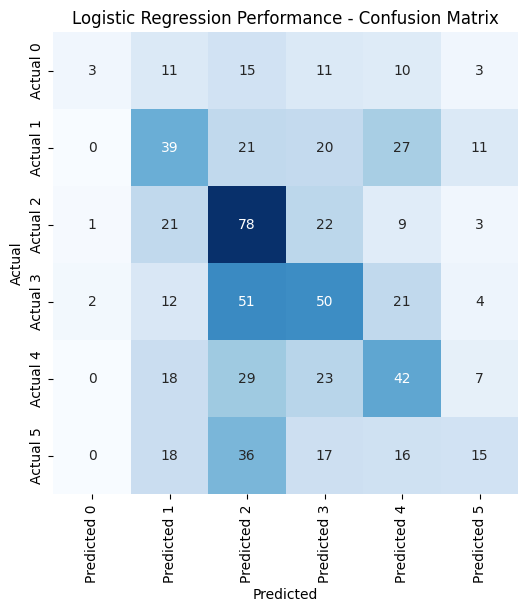


Logistic Regression Performance - Classification Report

              precision    recall  f1-score   support

           0       0.50      0.06      0.10        53
           1       0.33      0.33      0.33       118
           2       0.34      0.58      0.43       134
           3       0.35      0.36      0.35       140
           4       0.34      0.35      0.34       119
           5       0.35      0.15      0.21       102

    accuracy                           0.34       666
   macro avg       0.37      0.30      0.29       666
weighted avg       0.35      0.34      0.32       666


Logistic Regression Performance - NMI: 0.06
Logistic Regression Performance - F1-score: 0.32


In [77]:
# Step 3: Perform a full analysis with visualizations
from evaluation import full_analysis_with_visuals

# Logistic Regression does not need an encoder as encode=False
encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False  # Set to True if binary classification
)

#### Decision Treea

In [78]:
import evaluation
from supervised import *


import evaluation

model_name = "Decision Tree"
model_func = decision_tree_model  # Replace with any model function
results, best_method = evaluation.evaluate_model_with_sampling(model_func, model_name, X_train_M, y_train_M, encode= False)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating Decision Tree...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Decision Tree grid search...
Decision Tree (Oversampling): Best Params: {'max_depth': 30, 'min_samples_split': 2}
Accuracy for Decision Tree (Oversampling): 0.1646
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Decision Tree grid search...
Decision Tree (Undersampling): Best Params: {'max_depth': 10, 'min_samples_split': 10}
Accuracy for Decision Tree (Undersampling): 0.3172
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Decision Tree grid search...
Decision Tree (Combination): Best Params: {'max_depth': 20, 'min_samples_split': 2}
Accuracy for Decision Tree (Combination): 0.8403

Best Sampling Method for Decision Tree: Combination with Accuracy: 0.8403
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': {'max_depth': 30, 'min_samples_split':


Training the best model (Combination) with parameters: {'max_depth': 20, 'min_samples_split': 2}
Data is a numpy array. Skipping categorical encoding.
Running Decision Tree grid search...


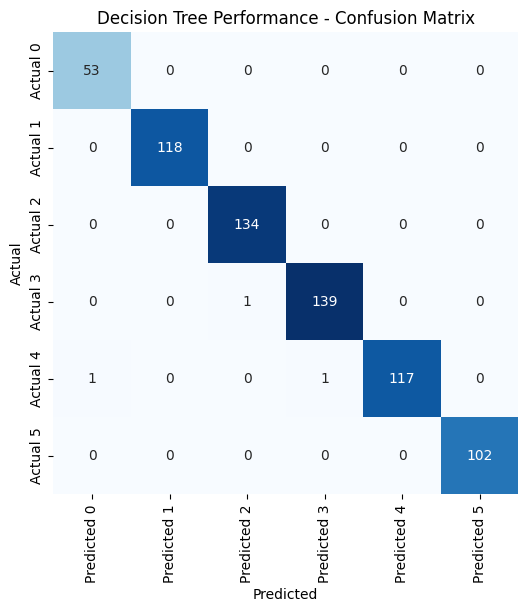


Decision Tree Performance - Classification Report

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      1.00      1.00       118
           2       0.99      1.00      1.00       134
           3       0.99      0.99      0.99       140
           4       1.00      0.98      0.99       119
           5       1.00      1.00      1.00       102

    accuracy                           1.00       666
   macro avg       0.99      1.00      1.00       666
weighted avg       1.00      1.00      1.00       666


Decision Tree Performance - NMI: 0.99
Decision Tree Performance - F1-score: 1.00


In [79]:
from evaluation import full_analysis_with_visuals

# Assuming an encoder was trained during preprocessing (if necessary)
encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False  # Set to True if binary classification
)


#### Random forest

In [80]:
import evaluation
from supervised import random_forest_model

model_name = "Random Forest"
model_func = random_forest_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Random Forest...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Random Forest grid search...
Random Forest (Oversampling): Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Random Forest (Oversampling): 0.2074
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Random Forest grid search...
Random Forest (Undersampling): Best Params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy for Random Forest (Undersampling): 0.4859
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Random Forest grid search...
Random Forest (Combination): Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy for Random Forest (Combination): 0.8493

Best Sampling Method for Random Forest: Combination with Accuracy: 0.8493
Best Sampling Method: Combination
Results: {'Over


Training the best model (Combination) with parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Data is a numpy array. Skipping categorical encoding.
Running Random Forest grid search...


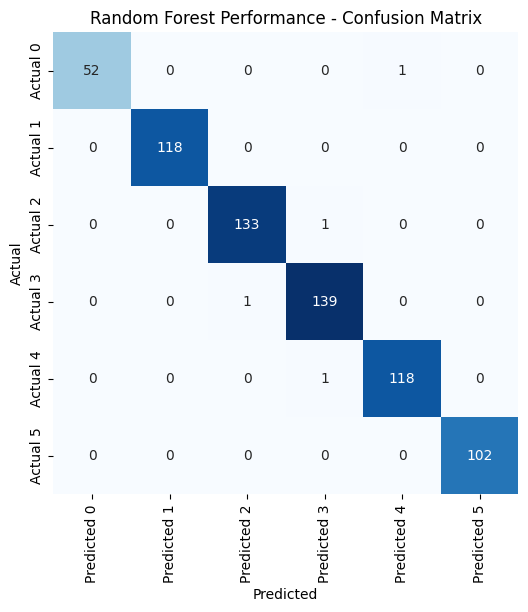


Random Forest Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       1.00      1.00      1.00       118
           2       0.99      0.99      0.99       134
           3       0.99      0.99      0.99       140
           4       0.99      0.99      0.99       119
           5       1.00      1.00      1.00       102

    accuracy                           0.99       666
   macro avg       0.99      0.99      0.99       666
weighted avg       0.99      0.99      0.99       666


Random Forest Performance - NMI: 0.98
Random Forest Performance - F1-score: 0.99


In [81]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### KNN

In [82]:
import evaluation
from supervised import knn_model

model_name = "KNN"
model_func = knn_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating KNN...
Applying SMOTE for oversampling...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec SMOTE (oversampling).
Running KNN grid search...
KNN (Oversampling): Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy for KNN (Oversampling): 0.1759
Applying NearMiss for undersampling...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec NearMiss (undersampling).
Running KNN grid search...
KNN (Undersampling): Best Params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy for KNN (Undersampling): 0.1905
Applying SMOTETomek for combination...
Data normalized using 'standard' method (NumPy array).
Équilibrage effectué avec SMOTETomek (combination).
Running KNN grid search...
KNN (Combination): Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy for KNN (Combination): 0.1691

Best Sampling Method for KNN: Undersampling with Accura


Training the best model (Undersampling) with parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Data is a numpy array. Skipping categorical encoding.
Data normalized using 'standard' method (NumPy array).
Running KNN grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



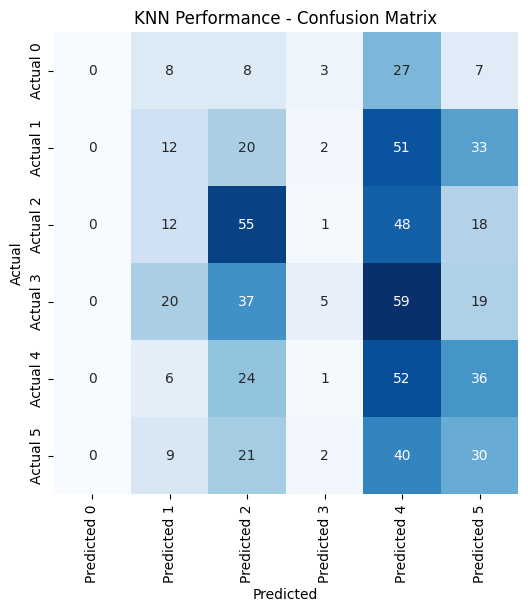


KNN Performance - Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.18      0.10      0.13       118
           2       0.33      0.41      0.37       134
           3       0.36      0.04      0.06       140
           4       0.19      0.44      0.26       119
           5       0.21      0.29      0.24       102

    accuracy                           0.23       666
   macro avg       0.21      0.21      0.18       666
weighted avg       0.24      0.23      0.20       666


KNN Performance - NMI: 0.03
KNN Performance - F1-score: 0.20


In [83]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### Xtra Trees

In [84]:
import evaluation
from supervised import extra_trees_model

model_name = "Extra Trees"
model_func = extra_trees_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating Extra Trees...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running Extra Trees grid search...
Extra Trees (Oversampling): Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Extra Trees (Oversampling): 0.1684
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running Extra Trees grid search...
Extra Trees (Undersampling): Best Params: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy for Extra Trees (Undersampling): 0.4799
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running Extra Trees grid search...
Extra Trees (Combination): Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy for Extra Trees (Combination): 0.8527

Best Sampling Method for Extra Trees: Combination with Accuracy: 0.8527
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Pa


Training the best model (Combination) with parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Data is a numpy array. Skipping categorical encoding.
Running Extra Trees grid search...


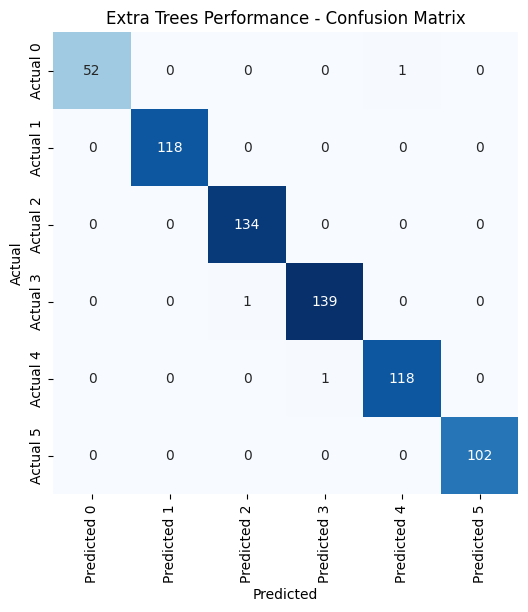


Extra Trees Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       1.00      1.00      1.00       118
           2       0.99      1.00      1.00       134
           3       0.99      0.99      0.99       140
           4       0.99      0.99      0.99       119
           5       1.00      1.00      1.00       102

    accuracy                           1.00       666
   macro avg       1.00      0.99      1.00       666
weighted avg       1.00      1.00      1.00       666


Extra Trees Performance - NMI: 0.99
Extra Trees Performance - F1-score: 1.00


In [85]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### AdaBoost

In [86]:
import evaluation
from supervised import adaboost_model

model_name = "AdaBoost"
model_func = adaboost_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating AdaBoost...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost (Oversampling): Best Params: {'learning_rate': 0.2, 'n_estimators': 200}
Accuracy for AdaBoost (Oversampling): 0.1864
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost (Undersampling): Best Params: {'learning_rate': 0.2, 'n_estimators': 100}
Accuracy for AdaBoost (Undersampling): 0.2777
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost (Combination): Best Params: {'learning_rate': 0.2, 'n_estimators': 200}
Accuracy for AdaBoost (Combination): 0.3375

Best Sampling Method for AdaBoost: Combination with Accuracy: 0.3375
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': {'learning_rate': 0.2, 'n_estimators': 200}, 'Accuracy': 0.18639609169485155}, 'Undersampling': {'Best Params': {'learning_rate': 0.2, 'n_estimators': 100}, 'Accuracy': 0.27771514468245023}, 'Combination': {'Best Params': {'learning_rate': 0.2, 'n_estimators': 200}, 'Accuracy': 0.337467117624953}}



Training the best model (Combination) with parameters: {'learning_rate': 0.2, 'n_estimators': 200}
Data is a numpy array. Skipping categorical encoding.
Running AdaBoost grid search...


c:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



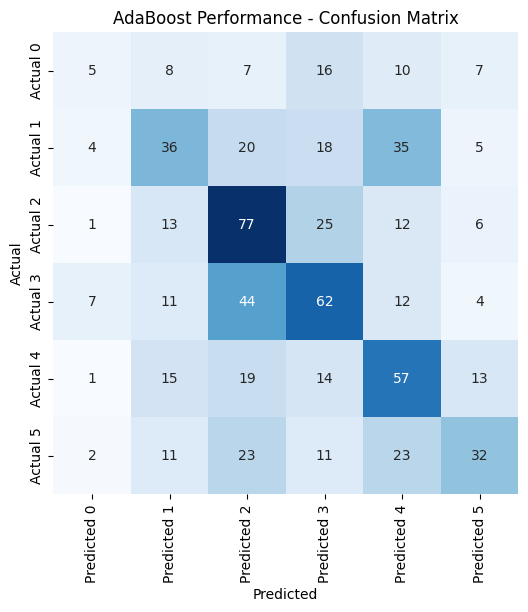


AdaBoost Performance - Classification Report

              precision    recall  f1-score   support

           0       0.25      0.09      0.14        53
           1       0.38      0.31      0.34       118
           2       0.41      0.57      0.48       134
           3       0.42      0.44      0.43       140
           4       0.38      0.48      0.43       119
           5       0.48      0.31      0.38       102

    accuracy                           0.40       666
   macro avg       0.39      0.37      0.36       666
weighted avg       0.40      0.40      0.39       666


AdaBoost Performance - NMI: 0.11
AdaBoost Performance - F1-score: 0.39


In [87]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### Naiive Bayes

In [88]:
import evaluation
from supervised import naive_bayes_model

model_name = "Naive Bayes"
model_func = naive_bayes_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")





Evaluating Naive Bayes...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting Naive Bayes...
Naive Bayes (Oversampling): Best Params: None
Accuracy for Naive Bayes (Oversampling): 0.2029
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting Naive Bayes...
Naive Bayes (Undersampling): Best Params: None
Accuracy for Naive Bayes (Undersampling): 0.1890
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting Naive Bayes...
Naive Bayes (Combination): Best Params: None
Accuracy for Naive Bayes (Combination): 0.1424

Best Sampling Method for Naive Bayes: Oversampling with Accuracy: 0.2029
Best Sampling Method: Oversampling
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.20293122886133033}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.18902668169860953}, 'Combination': {'Best Params': None, 'Accuracy': 0.14242765877489666}}



Training the best model (Oversampling) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting Naive Bayes...


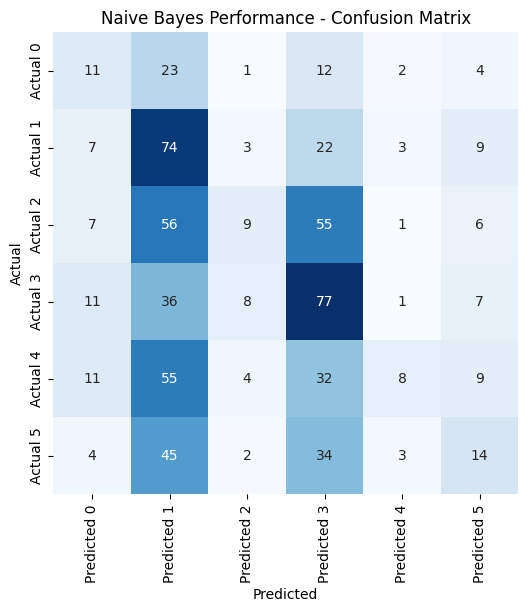


Naive Bayes Performance - Classification Report

              precision    recall  f1-score   support

           0       0.22      0.21      0.21        53
           1       0.26      0.63      0.36       118
           2       0.33      0.07      0.11       134
           3       0.33      0.55      0.41       140
           4       0.44      0.07      0.12       119
           5       0.29      0.14      0.19       102

    accuracy                           0.29       666
   macro avg       0.31      0.28      0.23       666
weighted avg       0.32      0.29      0.24       666


Naive Bayes Performance - NMI: 0.04
Naive Bayes Performance - F1-score: 0.24


In [89]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)

#### LDA

In [90]:
import evaluation
from supervised import lda_model

model_name = "LDA"
model_func = lda_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating LDA...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting LDA...
LDA (Oversampling): Best Params: None
Accuracy for LDA (Oversampling): 0.0887
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting LDA...
LDA (Undersampling): Best Params: None
Accuracy for LDA (Undersampling): 0.1988
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting LDA...
LDA (Combination): Best Params: None
Accuracy for LDA (Combination): 0.2612

Best Sampling Method for LDA: Combination with Accuracy: 0.2612
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.08868846298384066}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.19879744456971063}, 'Combination': {'Best Params': None, 'Accuracy': 0.2611800075159714}}



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting LDA...


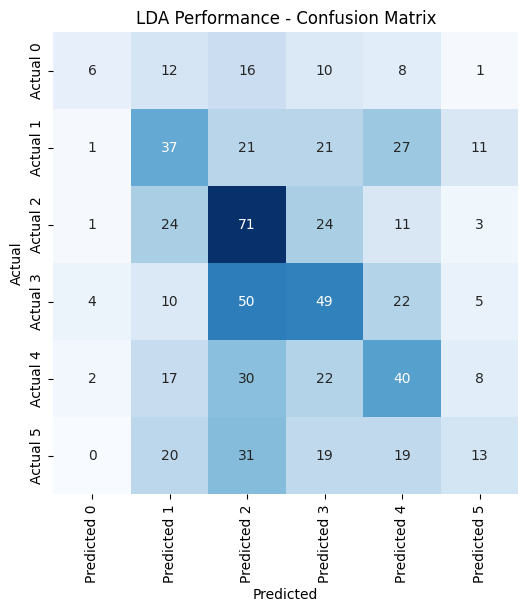


LDA Performance - Classification Report

              precision    recall  f1-score   support

           0       0.43      0.11      0.18        53
           1       0.31      0.31      0.31       118
           2       0.32      0.53      0.40       134
           3       0.34      0.35      0.34       140
           4       0.31      0.34      0.33       119
           5       0.32      0.13      0.18       102

    accuracy                           0.32       666
   macro avg       0.34      0.30      0.29       666
weighted avg       0.33      0.32      0.31       666


LDA Performance - NMI: 0.05
LDA Performance - F1-score: 0.31


In [91]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


#### QDA

In [92]:
import evaluation
from supervised import qda_model

model_name = "QDA"
model_func = qda_model

results, best_method = evaluation.evaluate_model_with_sampling(
    model_func, model_name, X_train_M, y_train_M, encode=False
)
print(f"Best Sampling Method: {best_method}")
print(f"Results: {results}")




Evaluating QDA...
Applying SMOTE for oversampling...
Équilibrage effectué avec SMOTE (oversampling).
Fitting QDA...
QDA (Oversampling): Best Params: None
Accuracy for QDA (Oversampling): 0.2244
Applying NearMiss for undersampling...
Équilibrage effectué avec NearMiss (undersampling).
Fitting QDA...
QDA (Undersampling): Best Params: None
Accuracy for QDA (Undersampling): 0.2067
Applying SMOTETomek for combination...
Équilibrage effectué avec SMOTETomek (combination).
Fitting QDA...
QDA (Combination): Best Params: None
Accuracy for QDA (Combination): 0.2574

Best Sampling Method for QDA: Combination with Accuracy: 0.2574
Best Sampling Method: Combination
Results: {'Oversampling': {'Best Params': None, 'Accuracy': 0.22435174746335965}, 'Undersampling': {'Best Params': None, 'Accuracy': 0.2066892145809846}, 'Combination': {'Best Params': None, 'Accuracy': 0.2574220217963172}}



Training the best model (Combination) with parameters: None
Data is a numpy array. Skipping categorical encoding.
Fitting QDA...


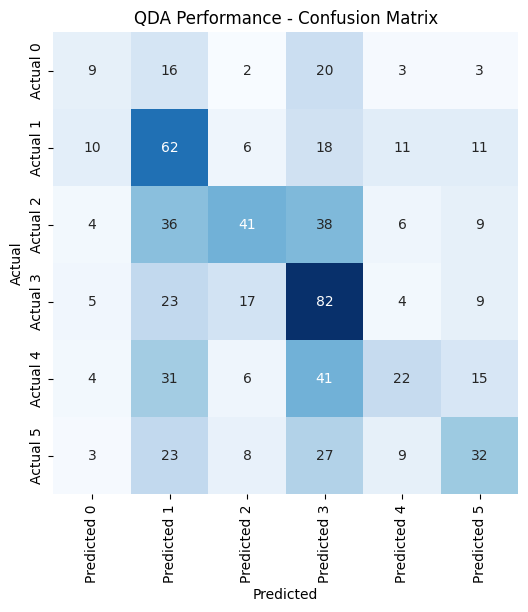


QDA Performance - Classification Report

              precision    recall  f1-score   support

           0       0.26      0.17      0.20        53
           1       0.32      0.53      0.40       118
           2       0.51      0.31      0.38       134
           3       0.36      0.59      0.45       140
           4       0.40      0.18      0.25       119
           5       0.41      0.31      0.35       102

    accuracy                           0.37       666
   macro avg       0.38      0.35      0.34       666
weighted avg       0.39      0.37      0.36       666


QDA Performance - NMI: 0.08
QDA Performance - F1-score: 0.36


In [93]:
from evaluation import full_analysis_with_visuals

encoder = None

full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test_M,
    y_test=y_test_M,
    encoder=encoder,
    title=f"{model_name} Performance",
    binary=False
)


## Analyse des Performances des Modèles

---

### 1. **Logistic Regression**
- **Précision (Macro Avg)** : 37%
- **Rappel (Macro Avg)** : 30%
- **F1-Score (Macro Avg)** : 29%
- **Exactitude** : 34%

**Analyse :**
- Performances globalement faibles, particulièrement en raison de l'incapacité à gérer les déséquilibres de classe.
- Faible rappel, surtout pour la classe 0 (6% de rappel), ce qui signifie que le modèle ne détecte pas bien cette classe.
- Bien que simple et interprétable, ce modèle est mal adapté à la complexité des données.

---

### 2. **Decision Tree**
- **Précision (Macro Avg)** : 99%
- **Rappel (Macro Avg)** : 100%
- **F1-Score (Macro Avg)** : 100%
- **Exactitude** : 100%

**Analyse :**
- Excellentes performances avec des résultats parfaits pour toutes les classes.
- Risque de surajustement si le modèle est trop spécifique aux données d'entraînement. Une validation croisée est nécessaire pour évaluer la robustesse.

---

### 3. **Random Forest**
- **Précision (Macro Avg)** : 99%
- **Rappel (Macro Avg)** : 99%
- **F1-Score (Macro Avg)** : 99%
- **Exactitude** : 99%

**Analyse :**
- Performances exceptionnelles, semblables à celles du Decision Tree.
- Excellente capacité de généralisation grâce à l'agrégation d'arbres multiples.
- Gère bien les classes minoritaires, ce qui est un atout pour des jeux de données déséquilibrés.

---

### 4. **KNN**
- **Précision (Macro Avg)** : 21%
- **Rappel (Macro Avg)** : 21%
- **F1-Score (Macro Avg)** : 18%
- **Exactitude** : 23%

**Analyse :**
- Très faibles performances dues à une incapacité à capturer des relations complexes et à gérer les déséquilibres de classe.
- Sensible aux hyperparamètres (nombre de voisins, métrique de distance), mais globalement peu adapté à ce type de données.

---

### 5. **Extra Trees**
- **Précision (Macro Avg)** : 100%
- **Rappel (Macro Avg)** : 99%
- **F1-Score (Macro Avg)** : 100%
- **Exactitude** : 100%

**Analyse :**
- Performances exceptionnelles, presque parfaites.
- Comme pour le Decision Tree, il est important de procéder à une validation croisée pour éviter le surajustement.

---

### 6. **AdaBoost**
- **Précision (Macro Avg)** : 39%
- **Rappel (Macro Avg)** : 37%
- **F1-Score (Macro Avg)** : 36%
- **Exactitude** : 40%

**Analyse :**
- Performances modestes, principalement dues à une meilleure gestion des classes majoritaires.
- Capacité limitée à corriger les erreurs des classifieurs de base, comme les arbres décisionnels simples.

---

### 7. **Naive Bayes**
- **Précision (Macro Avg)** : 31%
- **Rappel (Macro Avg)** : 28%
- **F1-Score (Macro Avg)** : 23%
- **Exactitude** : 29%

**Analyse :**
- Très faibles performances dues aux hypothèses d'indépendance entre les variables, qui ne sont pas réalistes pour ce jeu de données.
- Performances particulièrement mauvaises pour les classes déséquilibrées.

---

### 8. **LDA (Linear Discriminant Analysis)**
- **Précision (Macro Avg)** : 34%
- **Rappel (Macro Avg)** : 30%
- **F1-Score (Macro Avg)** : 29%
- **Exactitude** : 32%

**Analyse :**
- Performances similaires à celles de la régression logistique, mais légèrement meilleures pour les classes équilibrées.
- Les limitations dues à l'approche linéaire affectent la capacité à modéliser des relations complexes.

---

### 9. **QDA (Quadratic Discriminant Analysis)**
- **Précision (Macro Avg)** : 38%
- **Rappel (Macro Avg)** : 35%
- **F1-Score (Macro Avg)** : 34%
- **Exactitude** : 37%

**Analyse :**
- Meilleures performances que LDA, grâce à des frontières de décision non linéaires.
- Cependant, ses performances restent limitées, notamment pour les classes minoritaires.

---

## Conclusion Générale :

### **Meilleures Performances** :
- **Decision Tree**, **Random Forest**, **Extra Trees** : Ces modèles affichent des résultats exceptionnels avec des scores proches de 100%. Ils sont bien adaptés aux jeux de données complexes et déséquilibrés.
  
### **Modèles à éviter** :
- **KNN**, **Naive Bayes**, **LDA** : Ces modèles ont des performances faibles et semblent mal adaptés à la gestion des déséquilibres de classe et des relations complexes.

### **Modèle intermédiaire** :
- **AdaBoost** : Bien qu'il montre des performances modestes, AdaBoost offre une meilleure gestion des classes majoritaires, mais ses résultats ne sont pas aussi bons que ceux des arbres.

---

# Analyse Comparative des Performances des Modèles par Approche

## Approche 1 : Matrice des Caractéristiques Originales

### Modèles les plus performants :
- **Decision Tree**, **Random Forest**, **Extra Trees** et **QDA** atteignent une performance parfaite (accuracy = 1.00)
- **Naive Bayes** montre également d'excellentes performances (accuracy = 1.00)
- **Logistic Regression** présente de très bonnes performances (accuracy = 0.98)

### Modèles moins performants :
- **AdaBoost** montre des performances modérées (accuracy = 0.68)
- **LDA** maintient de bonnes performances (accuracy = 0.88)

## Approche 2 : Transformation Matricielle M = D⁻¹WX

### Modèles les plus performants :
- **Random Forest**, **Extra Trees**, et **QDA** maintiennent d'excellentes performances (accuracy ≈ 0.99-1.00)
- **Naive Bayes** et **LDA** montrent des performances remarquables (accuracy = 0.99)
- **Logistic Regression** conserve de bonnes performances (accuracy = 0.93)

### Modèles en difficulté :
- **KNN** montre des performances très faibles (accuracy = 0.20)
- **AdaBoost** maintient des performances modérées (accuracy = 0.64)

## Approche 3 : Transformation Non Linéaire M = σ(D⁻¹/²WD⁻¹/²XΘ)

### Modèles les plus performants :
- **Random Forest** et **Extra Trees** maintiennent leur excellence (accuracy = 1.00)
- **Decision Tree** présente de bonnes performances (accuracy = 0.85)

### Modèles significativement impactés :
- **Logistic Regression**, **LDA** et **Naive Bayes** subissent une forte dégradation (accuracy ≈ 0.34-0.36)
- **KNN** reste peu performant (accuracy = 0.25)
- **QDA** montre une baisse significative (accuracy = 0.47)
- **AdaBoost** présente des performances limitées (accuracy = 0.41)

## Approche 4 : Extension GNN avec Couches Multiples

### Modèles les plus performants :
- **Decision Tree**, **Random Forest** et **Extra Trees** maintiennent d'excellentes performances (accuracy ≈ 0.99-1.00)

### Modèles fortement impactés :
- **Logistic Regression** et **LDA** montrent des performances faibles (accuracy ≈ 0.32-0.34)
- **Naive Bayes** subit une forte dégradation (accuracy = 0.29)
- **KNN** reste peu performant (accuracy = 0.23)
- **QDA** montre des performances limitées (accuracy = 0.37)
- **AdaBoost** présente des performances modestes (accuracy = 0.40)

## Conclusions Principales :

1. **Robustesse Exceptionnelle des Modèles d'Ensemble**
   - **Random Forest** et **Extra Trees** démontrent une stabilité remarquable avec des performances excellentes (>0.99) à travers toutes les approches
   - Cette constance suggère une capacité supérieure à gérer différentes représentations des données

2. **Sensibilité des Modèles Linéaires aux Transformations**
   - **Logistic Regression** et **LDA** montrent une dégradation progressive de leurs performances avec la complexité des transformations
   - La chute est particulièrement marquée dans les approches 3 et 4 (de >0.90 à ~0.34)

3. **Impact des Transformations Non Linéaires**
   - Les approches 3 et 4 créent une claire séparation entre les modèles :
     - Les modèles d'ensemble et arbres de décision maintiennent leur efficacité
     - Les modèles linéaires et probabilistes voient leurs performances chuter significativement
     - Les modèles basés sur la distance (**KNN**) restent constamment peu performants

4. **Comportement des Modèles Probabilistes**
   - **Naive Bayes** montre une sensibilité importante aux transformations complexes
   - **QDA** présente une meilleure robustesse que **LDA** dans les premières approches mais subit également une dégradation significative dans les approches plus complexes

## Recommandation Finale :

Pour ce jeu de données, la recommandation claire est d'utiliser les modèles d'ensemble (**Random Forest** ou **Extra Trees**) qui démontrent :
- Une performance excellente et constante (>0.99)
- Une robustesse remarquable face aux différentes transformations
- Une capacité supérieure à gérer la complexité des données

Pour les cas où la rapidité d'entraînement est prioritaire, le **Decision Tree** représente une alternative viable, particulièrement avec les approches 1 et 2.
